# GOLD COAST HOTELS LIMITED

## PAA KWESI BLANKSON, DATA ANALYST 

In [173]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import squarify 
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import plotly.express as px
import folium

import patchworklib as pw #create different chart combinations


In [28]:
pd.options.display.min_rows=10 #Setting Display to first 5 and last 5 observations

In [29]:
space = "\n"

dash = "-----------------------------------------------------------"

<img src = "PS_Worksheet.jpg">

<img src = "Issue_Tree_Update.jpg">

In [30]:
#Importing & Reading countries table
all_countries = pd.read_csv(r"A:\Spring_Board_Data_Analytics\CAPSTONE\CAPSTONE II\1. Hotel booking demand\all.csv")

all_countries_sliced = all_countries[["name", "alpha-3", "region", "sub-region" ]]

#all_countries_sliced.head()

In [31]:
#Uploading the hotel_bookings dataset  

bookings = pd.read_csv(r"A:\Spring_Board_Data_Analytics\CAPSTONE\CAPSTONE II\1. Hotel booking demand\hotel_bookings.csv")
#bookings.head(1) #Having a feel of the hotel_bookings dataset

In [32]:
#bookings.columns # View how the columns line up

In [33]:
cols = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

In [34]:
#bookings[cols].dtypes

In [35]:
#bookings.info()

In [36]:
# DATA CLEANING & MANIPULATION

In [37]:
#all_countries_sliced.tail(1)

In [38]:
# I prefer to rename alpha-3 as country_code
countries = all_countries_sliced.rename(columns={"alpha-3":"country_code"})

#countries.head(3)

In [39]:
#Merging bookings table with countries so we can use country names instead of alpha-3 codes, Regions and Subregions are attached
bookings_data = pd.merge(bookings, 
                         countries,
                         how= "left",
                         left_on = "country",
                         right_on ="country_code"
                        )
#bookings_data.shape

In [40]:
#bookings_data.columns #note that new columns from the countries table have been added.

In [41]:
# Renaming important Columns
bookings_data.rename(columns={"hotel": "Hotel", 
                              "is_canceled":"Booking_Status", 
                              "arrival_date_year": "Arrival_Year",
                              "lead_time": "Lead_Time",
                              "meal":"Meal",
                              "arrival_date_month": "Arrival_Month", 
                              "arrival_date_day_of_month":"Arrival_Day_of_Month",
                              "stays_in_weekend_nights" : "Weekend_Night_Stayed",
                              "stays_in_week_nights":"Weekday_Nights_Stayed",
                              "market_segment": "Market_Segment_Designation",
                              'distribution_channel': "Booking_Distribution_Channel",
                              'is_repeated_guest': "Guest_Type",
                              'deposit_type': "Deposit_Type",
                              'agent':"Agent_Code",
                              'company': "Company_Code",  
                              'customer_type':"Customer_Type",
                              'adr': "ADR",
                              'reservation_status':"Reservation_Status", 
                              'reservation_status_date':"Reservation_Status_Date", 
                              'name':"Country", 
                              'region':"Region",
                              'sub-region':"Sub-Region"
                             }, inplace=True)

#bookings_data.tail(2)

In [42]:
bookings_data["Country"] = bookings_data["Country"].replace({"United Kingdom of Great Britain and Northern Ireland":"UK"})


In [43]:
#Dropping fields/ columns that are not useful to me at this time
bookings_data.drop([
                    'arrival_date_week_number',
                    "country",
                    'country_code',
                    'previous_bookings_not_canceled', 
                    'booking_changes',
                    'required_car_parking_spaces', 
                    'total_of_special_requests'], axis=1, inplace=True)

In [44]:
# Bolean Conversions: Changing data values to make them more understandable 

#Booking_Status
bookings_data['Booking_Status'] = bookings_data['Booking_Status'].replace(1, "Cancelled")
bookings_data['Booking_Status'] = bookings_data['Booking_Status'].replace(0, "Signed In")

#Meal 
bookings_data['Meal'] = bookings_data['Meal'].replace("BB", "Bed & Breakfast")
bookings_data['Meal'] = bookings_data['Meal'].replace("HB", "Half Board")
bookings_data['Meal'] = bookings_data['Meal'].replace("FB", "Full Board")
bookings_data['Meal'] = bookings_data['Meal'].replace("BB", "Self Catered")

#Guest Status/Type 
bookings_data['Guest_Type'] = bookings_data['Guest_Type'].replace(0, "First Timer")
bookings_data['Guest_Type'] = bookings_data['Guest_Type'].replace(1, "Client")

In [45]:
#bookings_data.count()

In [46]:
# Most of The Groups Occupancy is mainly driven by first timers. Management must work towards ensuring high retention levels..

In [47]:
#print("Summary Information for Gold Coast Hotels Limited" + space + dash)
#bookings_data.info()

In [48]:
# Identifying null/ NaN Values

In [49]:
# Which columns have the most missing data or observation........ What about isna?
null = pd.DataFrame({'No. of Missing' : bookings_data.isnull().sum(), '%tage Missing' : (bookings_data.isnull().sum()) / (bookings_data.shape[0]) * (100)})
#null.sort_values(by="No. of Missing", ascending =False)


In [50]:
# Three (3) Columns; Company (112593), agent (16340), country (1770), children (4) and Region/ subregion (1772) had missing values

In [51]:
# 94% of the observations are not attached to any Company so we drop it 

In [52]:
bookings_data.drop("Company_Code", inplace = True, axis = 1)

In [53]:
# bookings_data.isna().sum().sort_values(ascending=False)

In [54]:
#Lets assume that visitors who did not use any agent have NaN values in the Agent_Code column, thus lets assign "No Agent" to them
bookings_data["Agent_Code"].fillna("No Agent", inplace=True)

In [55]:
# bookings_data.isna().sum().sort_values(ascending=False)

In [56]:
# For the missing values in children, we replace them with the median value which is zero.
# bookings_data["children"].median()

In [57]:
bookings_data["children"].fillna(bookings_data["children"].median(), inplace=True)

In [58]:
# lets drop the remaining observations with missing values because they constitute less than 2% of our dataset 

bookings_data.dropna(inplace=True)

In [59]:
# bookings_data.isnull().sum()

In [60]:
#Lets remove all observations where No. of Adults == 0

bookings_data = bookings_data[bookings_data["adults"]!=0]

In [61]:
#Lets remove all observations where ADR is == 0

bookings_data = bookings_data[bookings_data["ADR"]>0]

In [62]:
#bookings_data.info()

In [63]:
#lets create a new column a new column/ fields for arrival date where we combine 3 columns (Month, day & Year) 

bookings_data["Arrival_Date"] =  bookings_data["Arrival_Month"] + " " + bookings_data["Arrival_Day_of_Month"].astype(str) + " " + bookings_data["Arrival_Year"].astype(str) 

# Convert above string date to a datetime series in python
bookings_data["Arrival_Date"] = pd.to_datetime(bookings_data["Arrival_Date"])


In [64]:
#Convert Year and Day to String

bookings_data["Arrival_Day_of_Month"] = bookings_data["Arrival_Day_of_Month"].astype(str)

bookings_data["Arrival_Year"] = bookings_data["Arrival_Year"].astype(str)

In [65]:
#Removing duplicates from the rows of data

#bookings_data = bookings_data.drop_duplicates(keep="first").reset_index().drop()

In [66]:
# bookings_data.info()

In [67]:
bookings_data.reset_index(drop=True, inplace=True)
bookings_data.index = bookings_data.index + 1 

In [68]:
#bookings_data.head(1)

In [69]:
# Add a new column called Total_Guests which is the sum of adults, children & babies 
bookings_data["Total_Guests"] = bookings_data["adults"] + bookings_data["children"] + bookings_data["babies"] 

# Add a new column called Total_Nights_Stayed which is sum of weekday nights + weekendnight
bookings_data["Total_Nights_Stayed"] = bookings_data['Weekend_Night_Stayed'] + bookings_data['Weekday_Nights_Stayed']

bookings_data["Revenue"] = bookings_data["ADR"] * bookings_data["Total_Nights_Stayed"]

#bookings_data.info()

In [70]:
#Slice dataframe into 2; city_hotel & resort_hotel
city_hotel = bookings_data[bookings_data["Hotel"] == "City Hotel"]
resort_hotel = bookings_data[bookings_data["Hotel"] == "Resort Hotel"]

#Slice dataframe into 2; cancellations & arrivals(signed In)
cancelled_df = bookings_data[bookings_data["Booking_Status"] == "Cancelled"]
signed_df = bookings_data[bookings_data["Booking_Status"] == "Signed In"]


#Order of preffered appearance 
hotel_order = ["City Hotel", "Resort Hotel"]
Market_Segment_Order = ['Online TA','Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Aviation', 
       'Complementary', 'Undefined']

#Assigning preffered color types
bookings_colors = {"Signed In":"#85C1E9","Cancelled":"#F82141"}
hotel_colors = {"City Hotel":"#17A589", "Resort Hotel":"#F39C12"}



In [71]:
# bookings_data[bookings_data["Booking_Status"] == "Signed In"].head(1)

# EXPLORATORY DATA ANALYSIS

### SUMMARY OF DESCRIPTIVE STATS

<b> The average revenue earned per the end of every successful booking is GBP 364.15 for the Group. </b>

In [72]:
signed_df.describe()

,Lead_Time,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,babies,previous_cancellations,days_in_waiting_list,ADR,Total_Guests,Total_Nights_Stayed,Revenue
count,71818.000000,71818.000000,71818.000000,71818.000000,71818.000000,71818.000000,71818.000000,71818.000000,71818.000000,71818.000000,71818.000000,71818.000000
mean,80.784845,0.939096,2.493386,1.844816,0.100045,0.010332,0.014328,1.630580,102.625404,1.955192,3.432482,354.733152
std,91.036298,0.979492,1.870873,0.495626,0.384550,0.113203,0.266648,15.010866,47.206777,0.663328,2.498353,320.585750
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.260000,1.000000,1.000000,1.000000
25%,9.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,70.000000,2.000000,2.000000,148.500000
50%,47.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,94.500000,2.000000,3.000000,266.000000
75%,125.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.000000,2.000000,4.000000,447.637500
max,709.000000,16.000000,40.000000,4.000000,3.000000,10.000000,13.000000,379.000000,510.000000,12.000000,56.000000,4452.000000


In [73]:

print("Average lead time for the Group is", str(round(((bookings_data.describe())["Lead_Time"][1]))/30) + " " + "months.")

print("Almost", str(round(((bookings_data.describe())["adults"][1]))) + " " + "adults " + "visit the 2 hotels every night.")

print("It averagely takes", str(round(((bookings_data.describe())["days_in_waiting_list"][1]),2)) + " " + "days" + " " + "for bookings to be confirmed to customers.")

print("The Minimum price per night is", "GBP" ,str(round(((bookings_data.describe())["ADR"][2]),2)) + " " + "whilst, the average price per night is" + " " + "GBP", str(round(((bookings_data.describe())["ADR"][1]),2))+".")

print("The average total night stayed is", str(round(((bookings_data.describe())["Total_Nights_Stayed"][1]),2))+".")

print("The average revenue earned per the end of every transaction is","GBP" ,str(round(((bookings_data.describe())["Revenue"][1]),2))+" for the Group.")

Average lead time for the Group is 3.5 months.
Almost 2 adults visit the 2 hotels every night.
It averagely takes 2.38 days for bookings to be confirmed to customers.
The Minimum price per night is GBP 49.18 whilst, the average price per night is GBP 103.68.
The average total night stayed is 3.45.
The average revenue earned per the end of every transaction is GBP 364.15 for the Group.


# ARRIVALS VRS CANCELLATIONS (3 Year Annual)

<b>There was a general increase in the total number of bookings from more than 21,000 in 2015 to approximately 40,000 bookings in 2017 but there was a reduction of ~15,000 between 2016 and 2017.</b>

In [74]:
bookings_data.groupby(["Arrival_Year"])["Arrival_Year"].count()

Arrival_Year
2015    21132
2016    54858
2017    39445
Name: Arrival_Year, dtype: int64

<Figure size 800x2000 with 0 Axes>

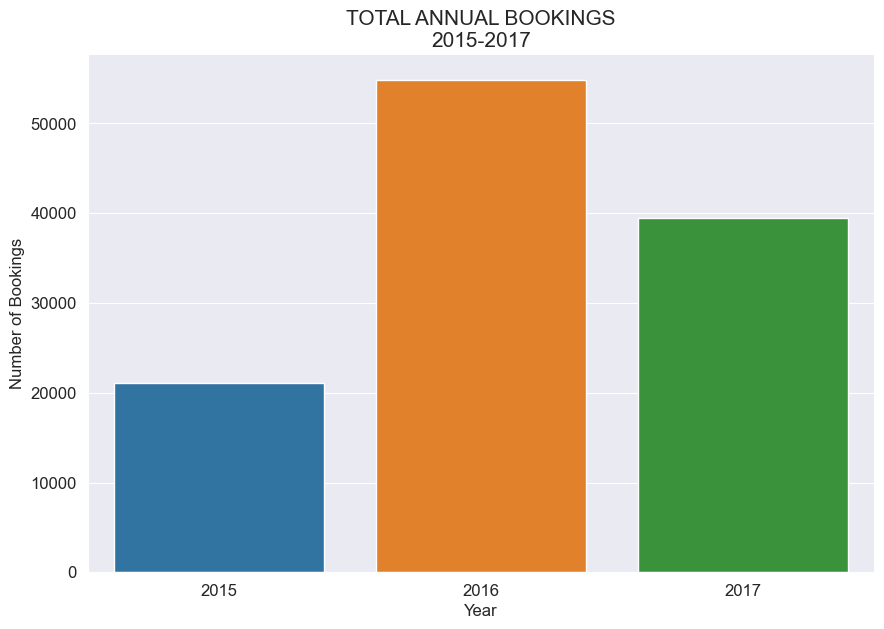

In [75]:
plt.figure(figsize=(8, 20))

a = sns.catplot(x= "Arrival_Year", 
                kind = "count",
              data=bookings_data,
               aspect = 1.5,
               height = 6)
a.set(xlabel ="Year", ylabel= "Number of Bookings")
plt.title("TOTAL ANNUAL BOOKINGS" + space + "2015-2017", size =15)
a.tight_layout
plt.show()

<b>Ratio of percentage signed in to percentage cancellations for 2017 was 60.69% : 39.31% which is worse in in the three(3) year period.</b>

In [76]:
#Annual %'tage ratio between Booking_Status & Sign Ins 
round(bookings_data.groupby("Arrival_Year")["Booking_Status"].value_counts(normalize=True) * 100, 2)

Arrival_Year  Booking_Status
2015          Signed In         62.03
              Cancelled         37.97
2016          Signed In         63.38
              Cancelled         36.62
2017          Signed In         60.69
              Cancelled         39.31
Name: Booking_Status, dtype: float64

<Figure size 800x2000 with 0 Axes>

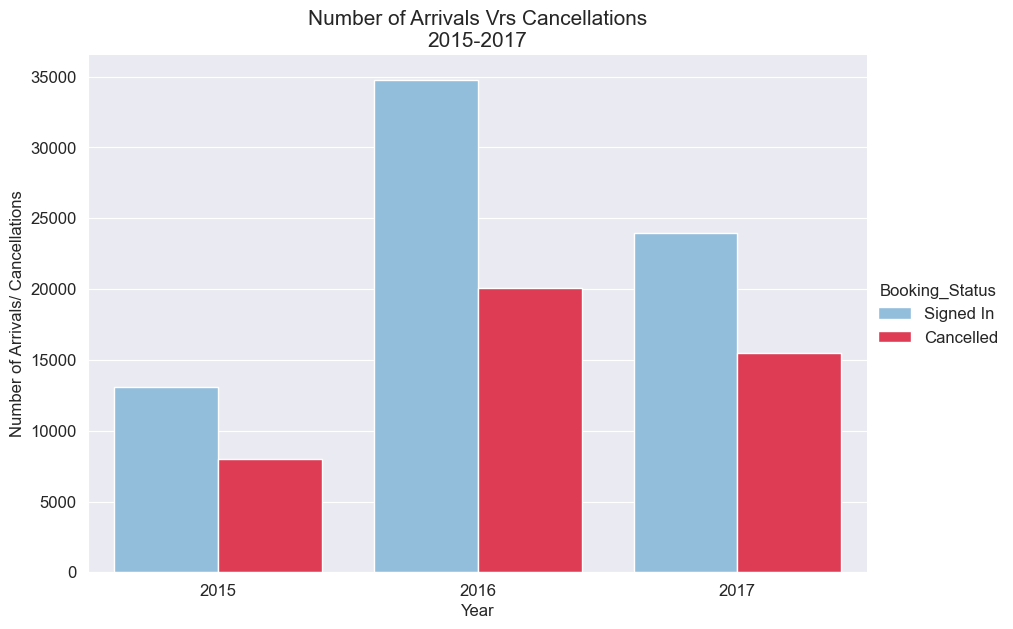

In [77]:
plt.figure(figsize=(8, 20))

a = sns.catplot(x= "Arrival_Year", 
              hue= "Booking_Status",
                kind = "count",
              data=bookings_data,
               aspect = 1.5,
               height = 6,
               palette = bookings_colors)
a.set(xlabel ="Year", ylabel= "Number of Arrivals/ Cancellations")
plt.title("Number of Arrivals Vrs Cancellations" + space + "2015-2017", size =15)
a.tight_layout
plt.show()

In [78]:
pd.crosstab(bookings_data.Arrival_Year, bookings_data.Booking_Status, margins=True)

Booking_Status,Cancelled,Signed In,All
Arrival_Year,,,
2015,8024,13108,21132
2016,20087,34771,54858
2017,15506,23939,39445
All,43617,71818,115435


# Trend of Total Guest Bookings | "Traffic"

<b>Total number of guests which is the sum of adults, children and babies indicates that total cancellations exceeded actual sign ins except the month of July for the combined three(3) year period.</b>

Text(0.5, 1.0, 'Cumulative Monthly Guest Arrivals Vrs Cancellations')

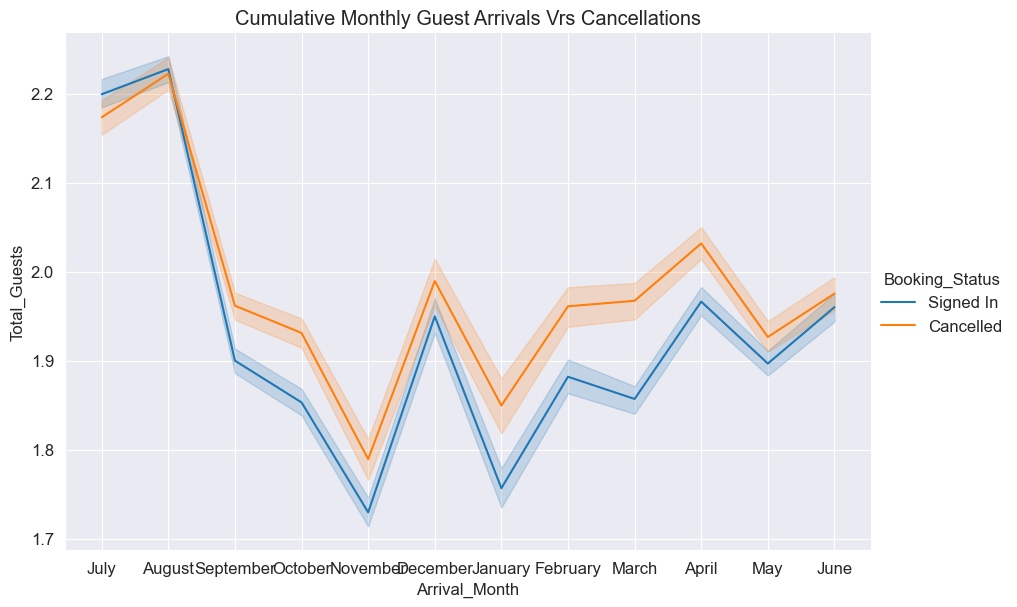

In [79]:
sns.relplot(
    x = "Arrival_Month",
    y= "Total_Guests",
    data = bookings_data,
    kind="line",
    hue = "Booking_Status",
    height = 6,
    aspect = 1.5,
)

plt.title("Cumulative Monthly Guest Arrivals Vrs Cancellations")

## HOTELS & NO. OF ACTUAL SIGN IN VRS CANCELLATIONS

<b> City Hotel mostly drives the Group's bookings demand and cancellations because its actual arrivals and cancellations exceeds that of Resort Hotel.</b>

<Figure size 1500x2000 with 0 Axes>

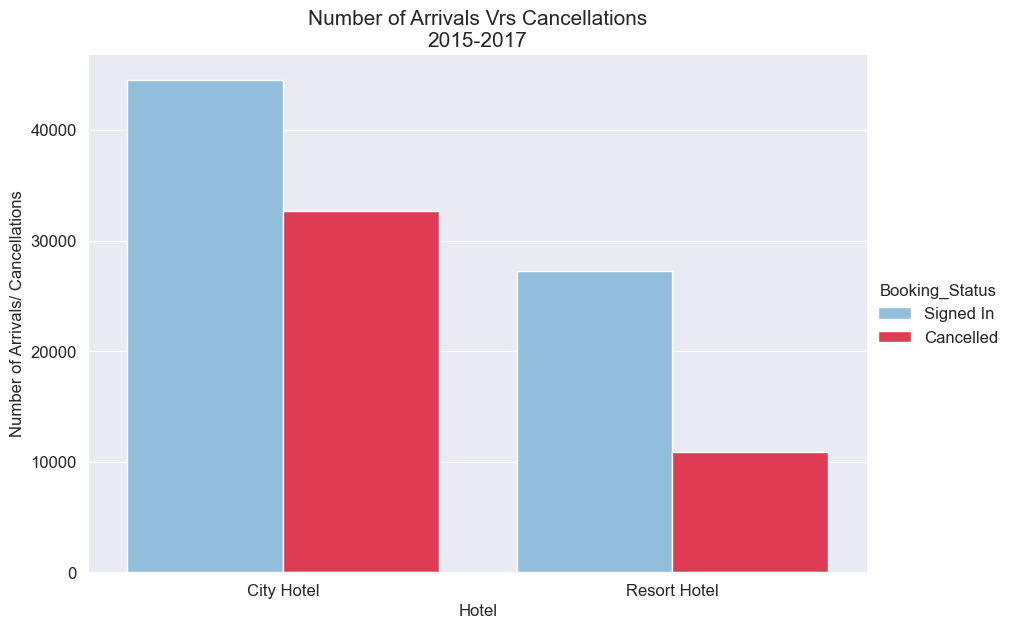

In [80]:
plt.figure(figsize=(15, 20))

b = sns.catplot(x = "Hotel",
            kind = "count",
            data = bookings_data,
            hue = "Booking_Status",
            order = ["City Hotel", "Resort Hotel"],
            aspect = 1.5,
            height = 6,
            palette = bookings_colors
                )
b.set(xlabel ="Hotel", ylabel= "Number of Arrivals/ Cancellations")
plt.title("Number of Arrivals Vrs Cancellations" + space + "2015-2017", size =15)
b.tight_layout
plt.show()


In [81]:
round(((bookings_data.groupby(["Arrival_Year", "Hotel"])["Booking_Status"].count() / bookings_data.Booking_Status.count()) *100), 2)

Arrival_Year  Hotel       
2015          City Hotel      11.44
              Resort Hotel     6.86
2016          City Hotel      32.23
              Resort Hotel    15.30
2017          City Hotel      23.28
              Resort Hotel    10.89
Name: Booking_Status, dtype: float64

In [82]:
pd.crosstab(bookings_data.Arrival_Year, bookings_data.Hotel, margins=True)


Hotel,City Hotel,Resort Hotel,All
Arrival_Year,,,
2015,13210,7922,21132
2016,37200,17658,54858
2017,26875,12570,39445
All,77285,38150,115435


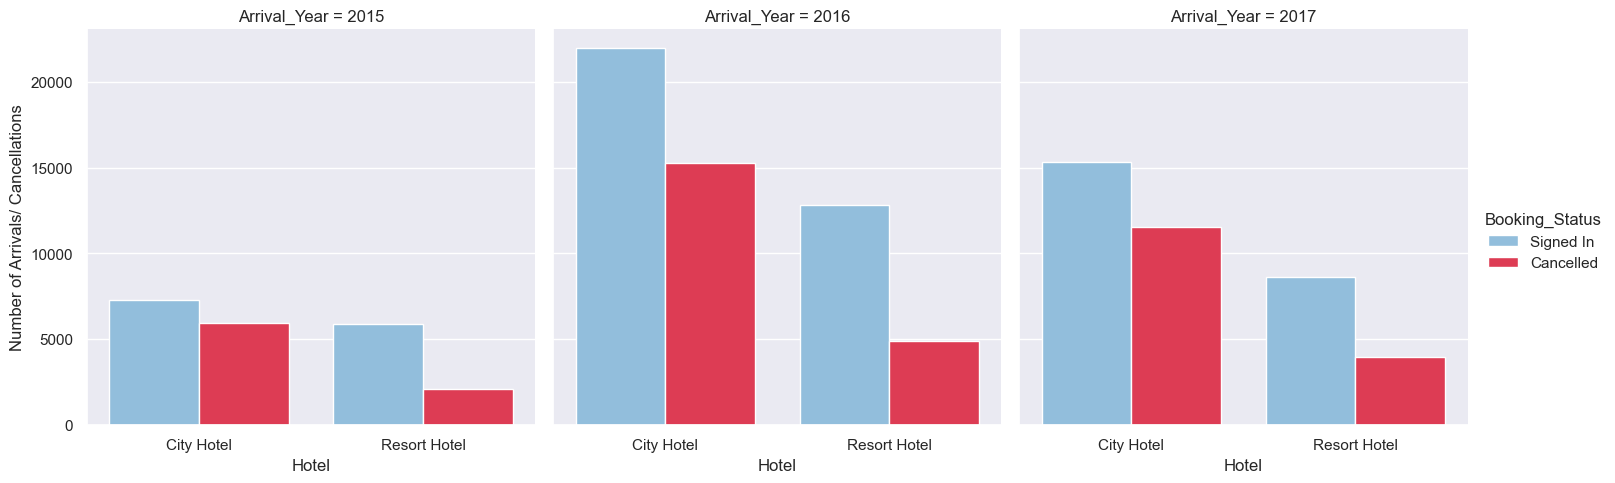

In [83]:
sns.set(rc={"figure.figsize":(18,18)})

b = sns.catplot(x = "Hotel",
            kind = "count",
            data = bookings_data,
            hue = "Booking_Status",
            order = ["City Hotel", "Resort Hotel"],
            #aspect = 1.5,
            #height = 6,
            palette = bookings_colors,
            col = "Arrival_Year"
                )
b.set(xlabel ="Hotel", ylabel= "Number of Arrivals/ Cancellations")
plt.show()


## ACTUAL ARRIVALS BY MONTH & HOTEL TYPE

<b>Hotel arrivals peaks in both hotels during the month of August but also remains relatively high between the months of May and October.</b>

Text(0.5, 1.0, 'Number of arrivals By Month')

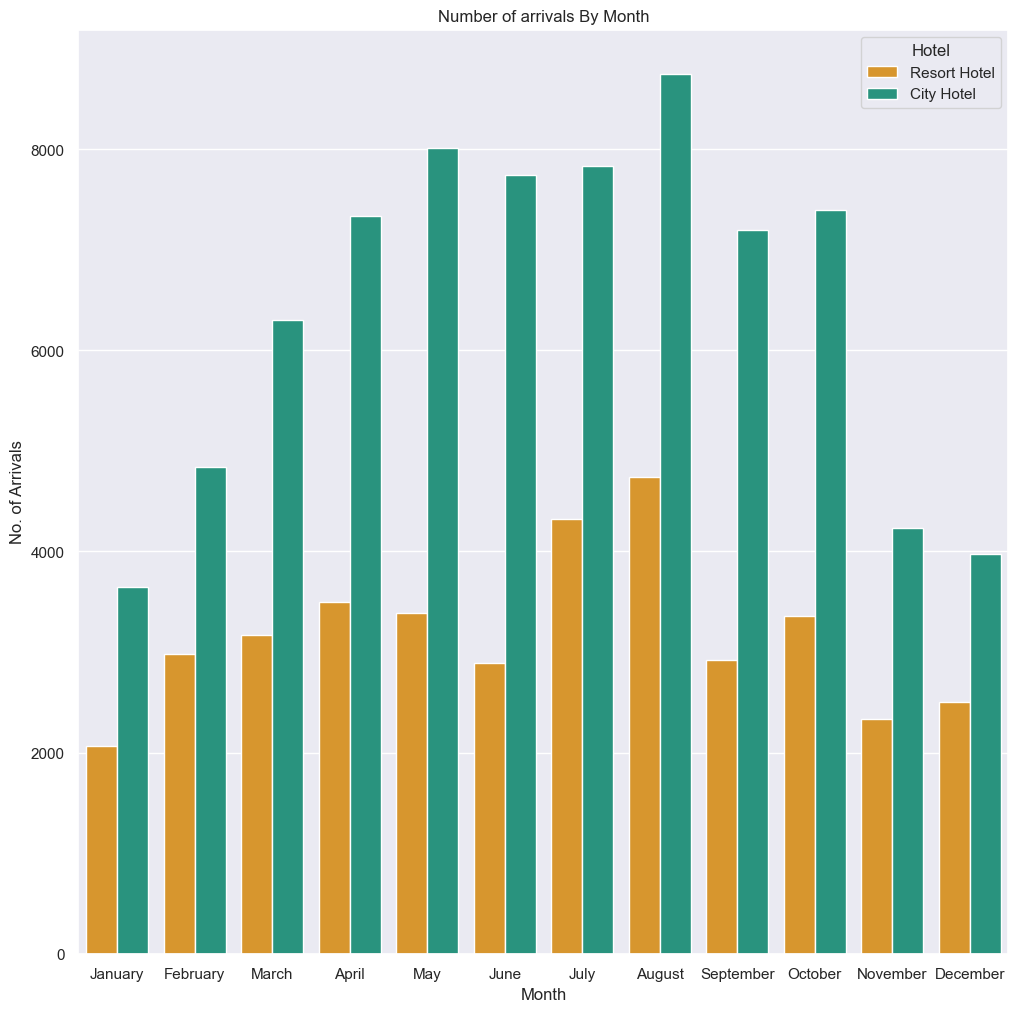

In [84]:
sns.set(rc={"figure.figsize":(12,12)})
graph = sns.countplot(x= "Arrival_Month", hue = "Hotel",
                      data = bookings_data,
                      palette = hotel_colors,
                      order=["January", 'February', "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
graph.set_xlabel("Month", fontsize=12)
graph.set_ylabel("No. of Arrivals", fontsize=12)
graph.set_title("Number of arrivals By Month")


<b> Even though the number of guest arrivals at City Hotel is mostly higher than Resort Hotel, their general trend mimics each other whiles the lowest number of guest arrivals was recorded between November 2015 and February 2016. </b>

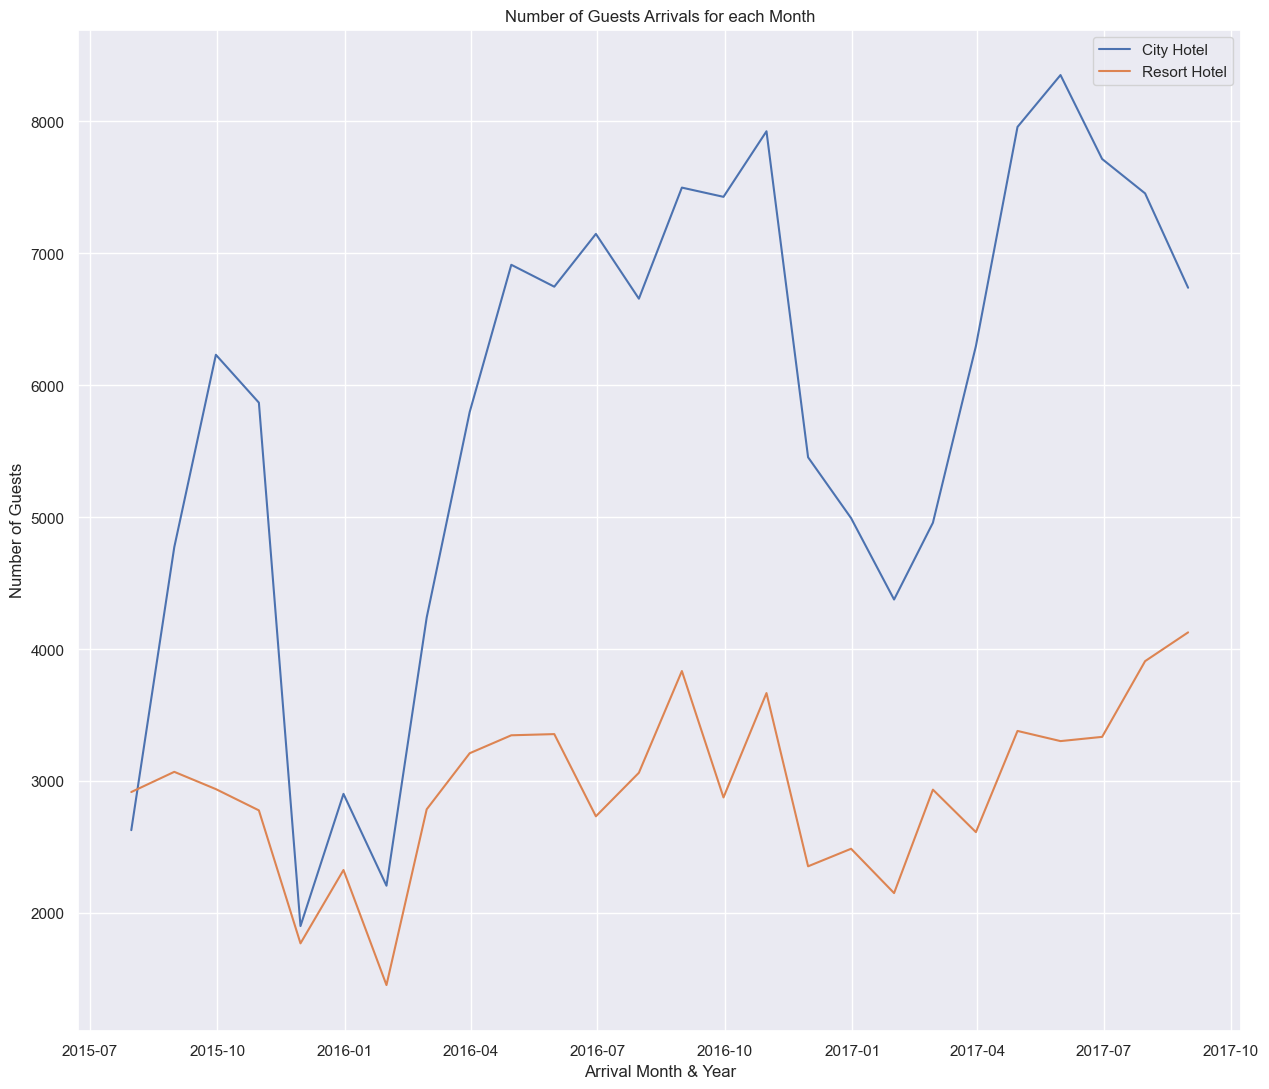

In [85]:
sns.set(rc={"figure.figsize": (15,13)})
fig, ax = plt.subplots()

#Fixing a line plot for total number of guests for each month for City 
sns.lineplot(
           data = bookings_data[bookings_data["Hotel"]=="City Hotel"].groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "M")).sum().reset_index(),
            x= "Arrival_Date",
            y= "Total_Guests",
            ax = ax
           )


#Fixing a line plot for total number of guests for each month for Resort  
sns.lineplot(
           data = bookings_data[bookings_data["Hotel"]=="Resort Hotel"].groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "M")).sum().reset_index(),
            x= "Arrival_Date",
            y= "Total_Guests",
            ax = ax
           )

#set label names
ax.set(title = "Number of Guests Arrivals for each Month", xlabel= "Arrival Month & Year", ylabel = "Number of Guests")
plt.legend(labels=["City Hotel","Resort Hotel"])


## Monthly Cancellations and Customers by Hotel 

<b> Resort Hotel is more efficient in minimizing cancellations overtime as compared to City Hotel, number of cancellations by guest count hardly exceeds 1,500.</b>

Text(0, 0.5, 'Number of Cancellations')

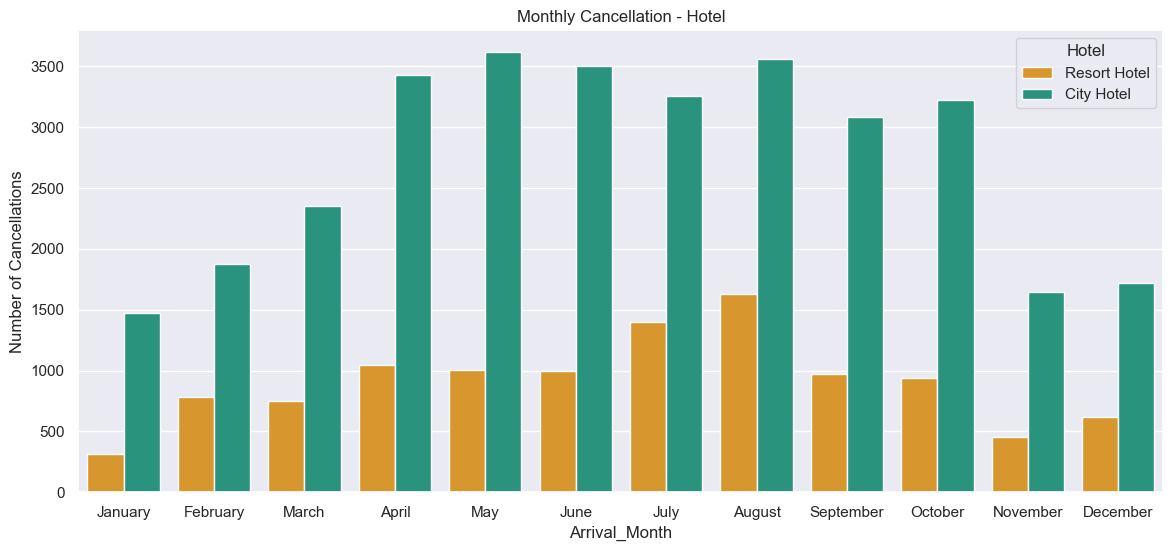

In [86]:
plt.figure(figsize =(14,6))
plt.title("Monthly Cancellation - Hotel")
b = sns.countplot(x = "Arrival_Month", hue = 'Hotel', data = cancelled_df, palette = hotel_colors, 
                  order=["January", 'February', "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"] )
b.set_ylabel("Number of Cancellations")

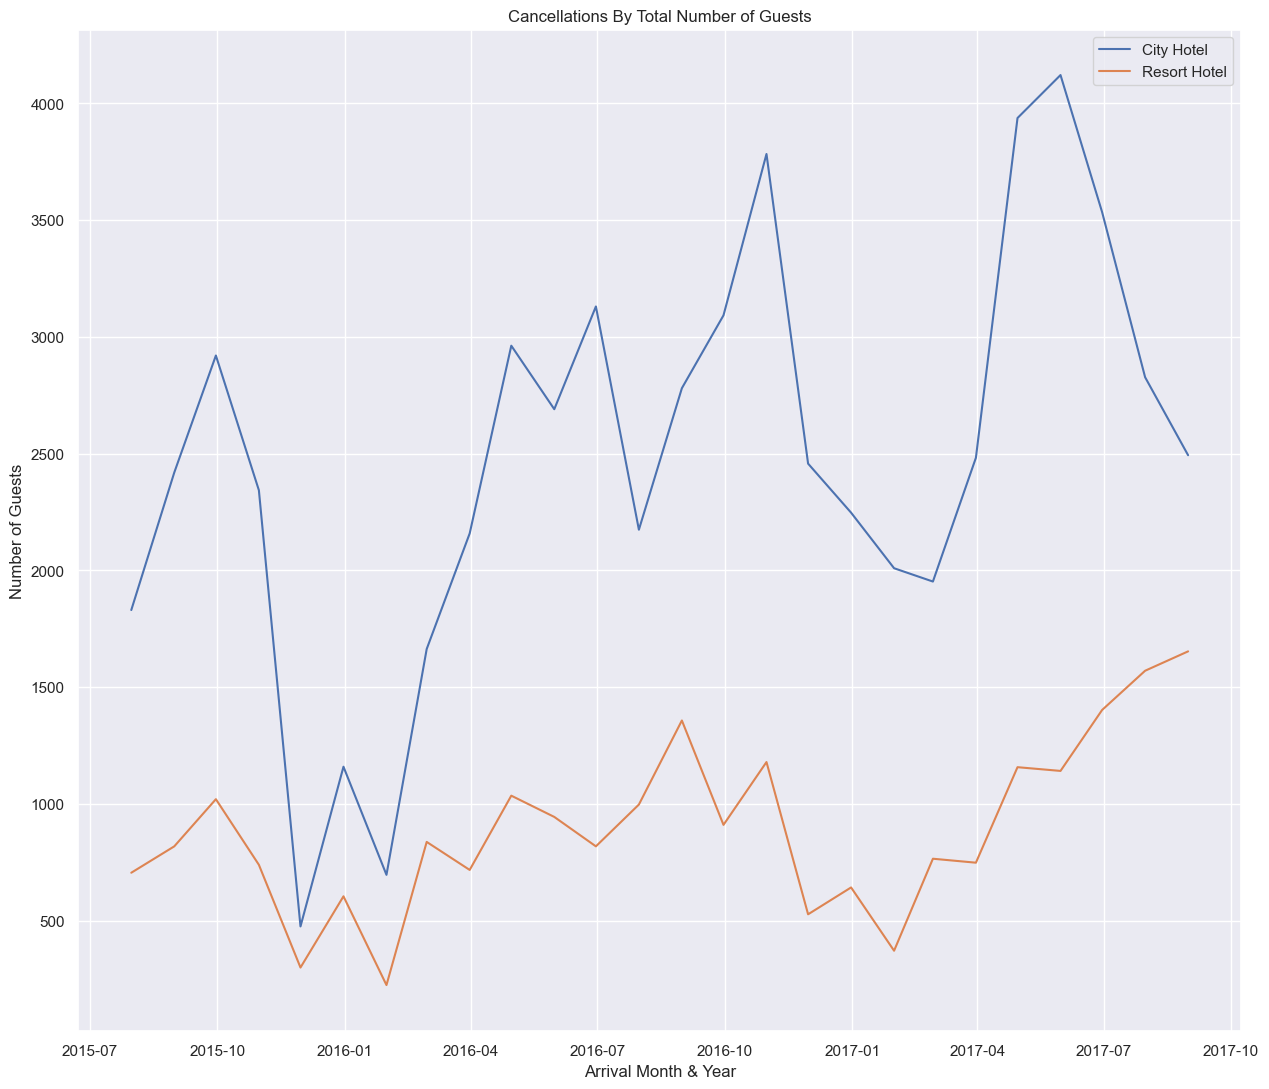

In [87]:
sns.set(rc={"figure.figsize": (15,13)})
fig, ax = plt.subplots()

#Fixing a line plot for total number of guests for each month for City 
sns.lineplot(
           data = cancelled_df[cancelled_df["Hotel"]=="City Hotel"].groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "M")).sum().reset_index(),
            x= "Arrival_Date",
            y= "Total_Guests",
            ax = ax
           )

#Fixing a line plot for total number of guests for each month for Resort  
sns.lineplot(
           data = cancelled_df[cancelled_df["Hotel"]=="Resort Hotel"].groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "M")).sum().reset_index(),
            x= "Arrival_Date",
            y= "Total_Guests",
            ax = ax
           )

#set label names
ax.set(title = "Cancellations By Total Number of Guests", xlabel= "Arrival Month & Year", ylabel = "Number of Guests")
plt.legend(labels=["City Hotel","Resort Hotel"])

### MARKET SEGMENT & DISTRIBUTION CHANNELS 

<b> Most of the arrivals and cancellations by Market segment and Distribution Channels were mainly influenced by online Trave Agents (TA) and Travel Agents/ Tour Operators (TA/TO) respectively. </b>

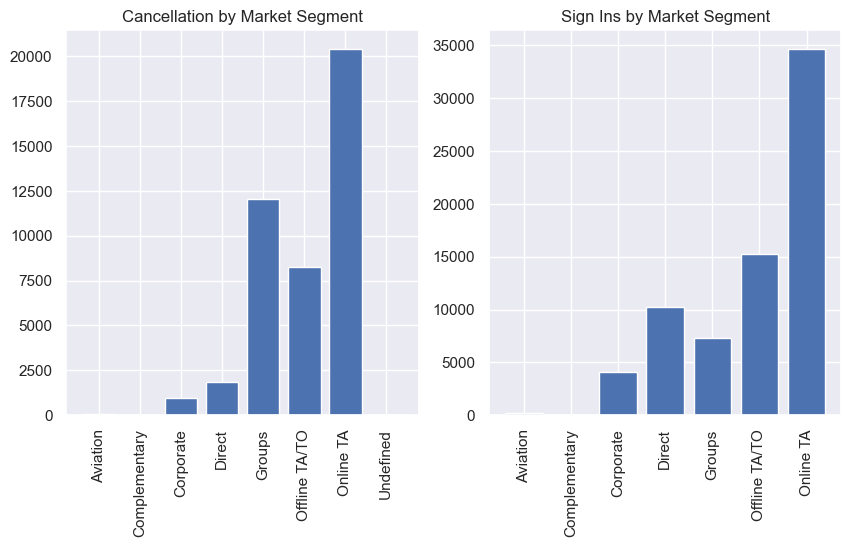

In [88]:
# Bookings Vrs Cancellations by Market Segment 
plt.figure(figsize = (10,5))
#plt.title("Cancellations & Arrivals by Market Segments", fontdict = {'fontsize':20})
plt.subplot(1,2,1) #I want 1 Row, with 2 Columns. This Chart will be position1. 

tmp_df = bookings_data.groupby(['Booking_Status','Market_Segment_Designation']).count()['Hotel'].reset_index()
tmp_df_cancelled = tmp_df[tmp_df['Booking_Status']=='Cancelled']
tmp_df_signed_in = tmp_df[tmp_df['Booking_Status']=='Signed In']
plt.bar(x=tmp_df_cancelled['Market_Segment_Designation'], height=tmp_df_cancelled['Hotel'])
plt.xticks(rotation=90)
plt.title("Cancellation by Market Segment")

plt.subplot(1,2,2)
plt.bar(x=tmp_df_signed_in['Market_Segment_Designation'], height=tmp_df_signed_in['Hotel'])
plt.xticks(rotation=90)
plt.title("Sign Ins by Market Segment")
plt.show()
#c = sns.countplot(x = "Market_Segment_Designation", hue = 'Booking_Status', data = bookings_data, order = Market_Segment_Order, palette = bookings_colors, ax = ax1)


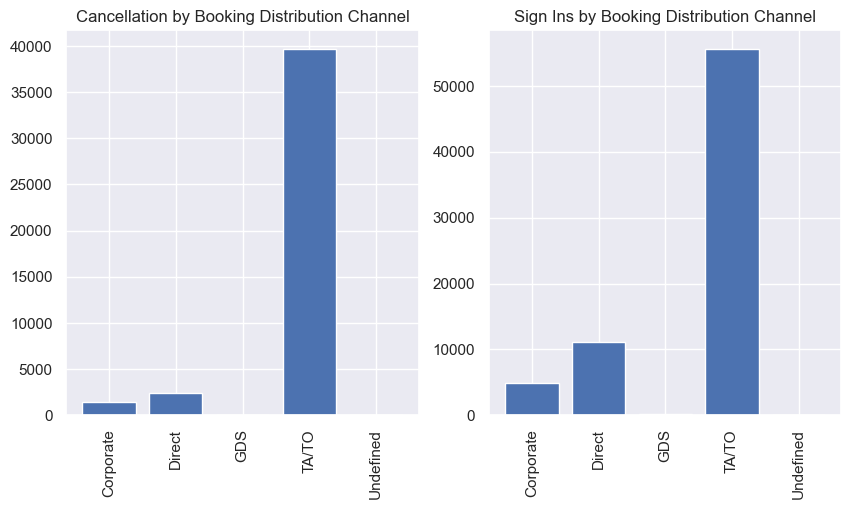

In [89]:
# Bookings Vrs Cancellations by Market Segment 
plt.figure(figsize = (10,5))
#plt.title("Cancellations & Arrivals by Market Segments", fontdict = {'fontsize':20})
plt.subplot(1,2,1) #I want 1 Row, with 2 Columns. This Chart will be position1. 

tmp_df = bookings_data.groupby(['Booking_Status', "Booking_Distribution_Channel"]).count()['Hotel'].reset_index()
tmp_df_cancelled = tmp_df[tmp_df['Booking_Status']=='Cancelled']
tmp_df_signed_in = tmp_df[tmp_df['Booking_Status']=='Signed In']
plt.bar(x=tmp_df_cancelled["Booking_Distribution_Channel"], height=tmp_df_cancelled['Hotel'])
plt.xticks(rotation=90)
plt.title("Cancellation by Booking Distribution Channel")

plt.subplot(1,2,2)
plt.bar(x=tmp_df_signed_in["Booking_Distribution_Channel"], height=tmp_df_signed_in['Hotel'])
plt.xticks(rotation=90)
plt.title("Sign Ins by Booking Distribution Channel")
plt.show()
#c = sns.countplot(x = "Market_Segment_Designation", hue = 'Booking_Status', data = bookings_data, order = Market_Segment_Order, palette = bookings_colors, ax = ax1)


In [90]:
# Bookings Vrs Cancellations by Market Segment 

#plt.figure(figsize = (13,10))
#plt.title("Cancellations & Arrivals by Booking Distribution Channels", fontdict = {'fontsize':20})
#c = sns.countplot(x = "Booking_Distribution_Channel", hue = 'Booking_Status', data = bookings_data, palette = bookings_colors)


## GUEST TYPE

<b>The Groups clients (i.e. customers who visit more than once) account for only 2.83% of total bookings whereas one time visitors account for 97.17%.</b>

In [91]:
#(bookings_data.groupby(['Guest_Type', "Hotel", "Booking_Status"])["Hotel"].count()/ bookings_data["Hotel"].count()) * 100  #Write code to change 119390

In [92]:
t = pd.crosstab(bookings_data.Hotel, bookings_data.Guest_Type, margins=True)

#Insert percent columns
t['pct_client']=round(t["Client"]*100/ bookings_data["Hotel"].count(), 2)
t['pct_first']=round(t["First Timer"]*100/ bookings_data["Hotel"].count(), 2)
t['pct_all']=round(t["All"]*100/ bookings_data["Hotel"].count(), 2)
#tab =tab.sort_values(by="pct_all", ascending=False)
t

Guest_Type,Client,First Timer,All,pct_client,pct_first,pct_all
Hotel,,,,,,
City Hotel,1630,75655,77285,1.41,65.54,66.95
Resort Hotel,1633,36517,38150,1.41,31.63,33.05
All,3263,112172,115435,2.83,97.17,100.00


<AxesSubplot:ylabel='Hotel'>

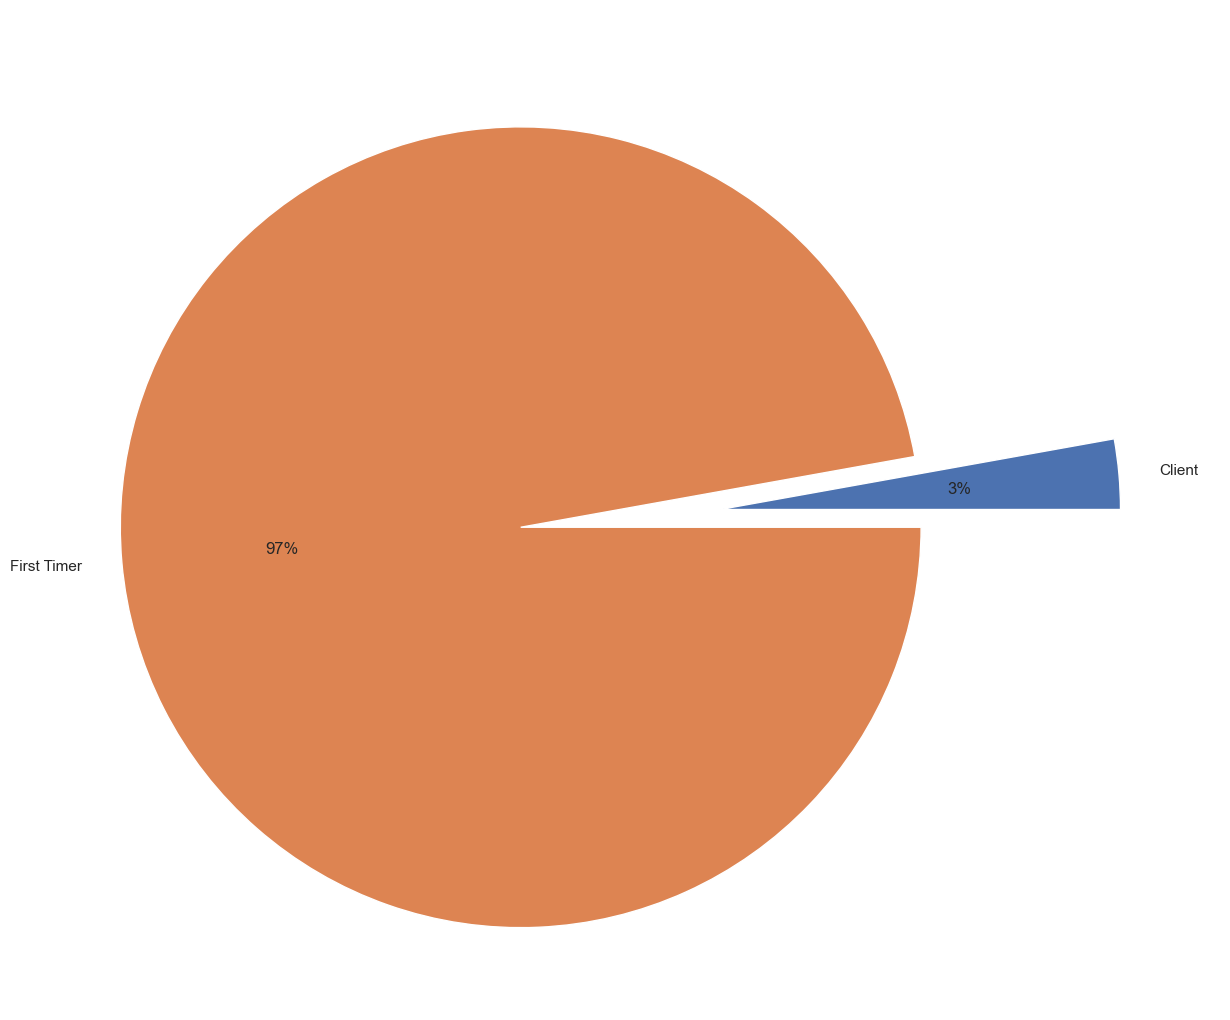

In [93]:
bookings_data.groupby("Guest_Type")["Hotel"].count().plot(kind="pie", autopct = '%.0f%%', explode = [0, 0.5])

<b> First timer cancellations exceeded 40,000 which is ~37% of the total bookings.</b>

<Figure size 2000x1400 with 0 Axes>

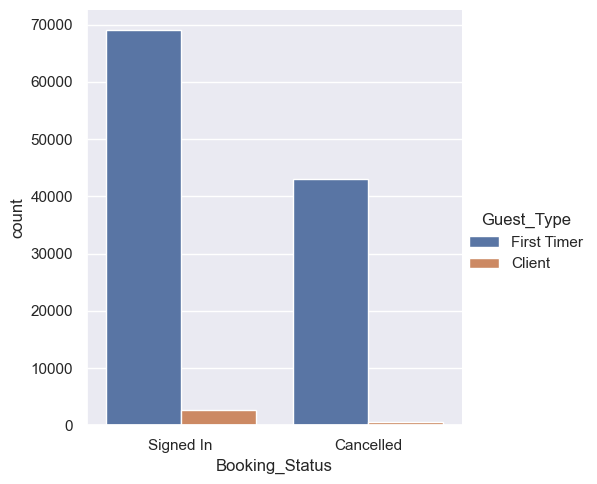

In [94]:
plt.figure(figsize =(20,14))
sns.catplot(x= "Booking_Status",
            kind = "count",
            hue = "Guest_Type",
            data= bookings_data)

In [95]:
round((bookings_data.groupby(["Guest_Type", "Booking_Status"])["Booking_Status"].count() / bookings_data["Booking_Status"].count() * 100), 2)

Guest_Type   Booking_Status
Client       Cancelled          0.46
             Signed In          2.37
First Timer  Cancelled         37.33
             Signed In         59.85
Name: Booking_Status, dtype: float64

<AxesSubplot:ylabel='Booking_Status'>

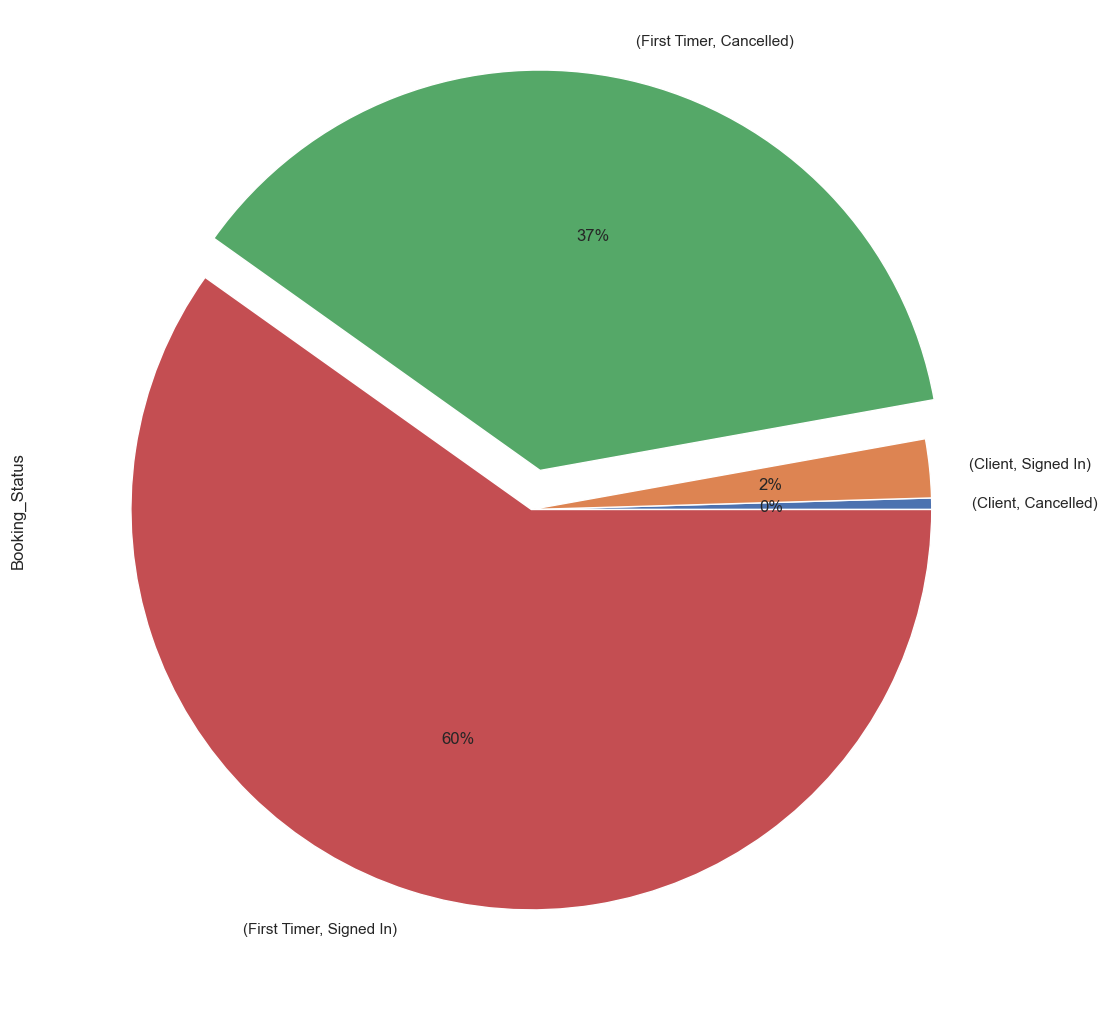

In [96]:
round((bookings_data.groupby(["Guest_Type", "Booking_Status"])["Booking_Status"].count() / bookings_data["Booking_Status"].count() * 100), 2).plot(kind="pie", explode = [0, 0, 0.1, 0 ], autopct = '%.0f%%')

## DRILL DOWN ON FIRST TIMERs

<b>Two(2) countries from the EU, Portugal and the UK account for 50% of total First Timer bookings. </b>

In [97]:
# First Timers are actual drivers of booking demand and cancellations as shown, 
#shape/length of observations nearly unchanged after slicing

first_timer_df = bookings_data[bookings_data["Guest_Type"]=="First Timer"]
first_timer_df.shape

(112172, 32)

In [98]:
#Creating a new DataFrame for First Timer Countries
ft_countries = pd.DataFrame(first_timer_df["Country"].value_counts())
ft_countries["Country"] = ft_countries["Country"].replace({"United Kingdom of Great Britain and Northern Ireland":"UK"})
ft_countries.head(5)

,Country
Portugal,44227
UK,11946
France,10264
Spain,8393
Germany,7208


In [99]:
ft_countries.rename(columns={"Country": "Number of Guests"}, inplace=True)
total_guests = ft_countries["Number of Guests"].sum()
ft_countries["Guests in %"] = round(ft_countries["Number of Guests"] / total_guests * 100, 2)
ft_countries["country"] = ft_countries.index
ft_countries.head(2)

,Number of Guests,Guests in %,country
Portugal,44227,39.43,Portugal
UK,11946,10.65,UK


In [100]:
#Delete country column in countries
ft_countries.drop('country', axis=1, inplace=True)

In [101]:
#Finding the top 10 countries where First Timers come from
top_10_ft_countries = ft_countries.iloc[:10][["Number of Guests", "Guests in %"]]
top_10_ft_countries.rename(columns={'index':"Country"}, inplace=True)
top_10_ft_countries

,Number of Guests,Guests in %
Portugal,44227,39.43
UK,11946,10.65
France,10264,9.15
Spain,8393,7.48
Germany,7208,6.43
Italy,3701,3.30
Ireland,3334,2.97
Belgium,2302,2.05
Brazil,2187,1.95
Netherlands,2071,1.85


<AxesSubplot:ylabel='No. of Bookings'>

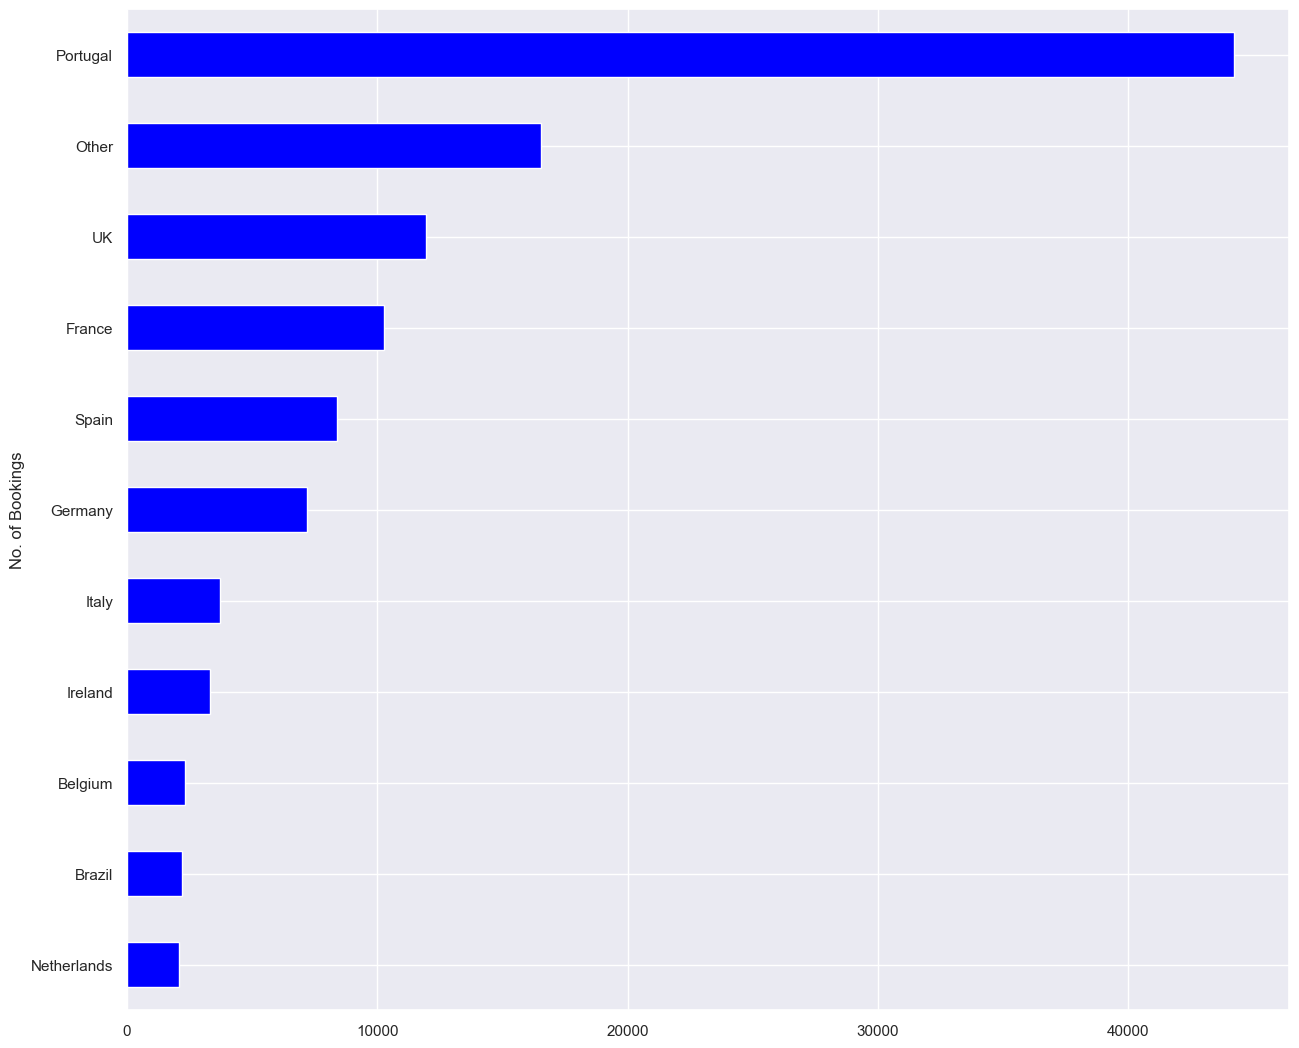

In [102]:
def topn(ser, n=10):
    vals = ser.value_counts().index[:10]
    return ser.where(ser.isin(vals), "Other")

(first_timer_df
.Country
.pipe(topn)
.value_counts(ascending=True)
.plot.barh(color="blue", ylabel = "No. of Bookings")
)

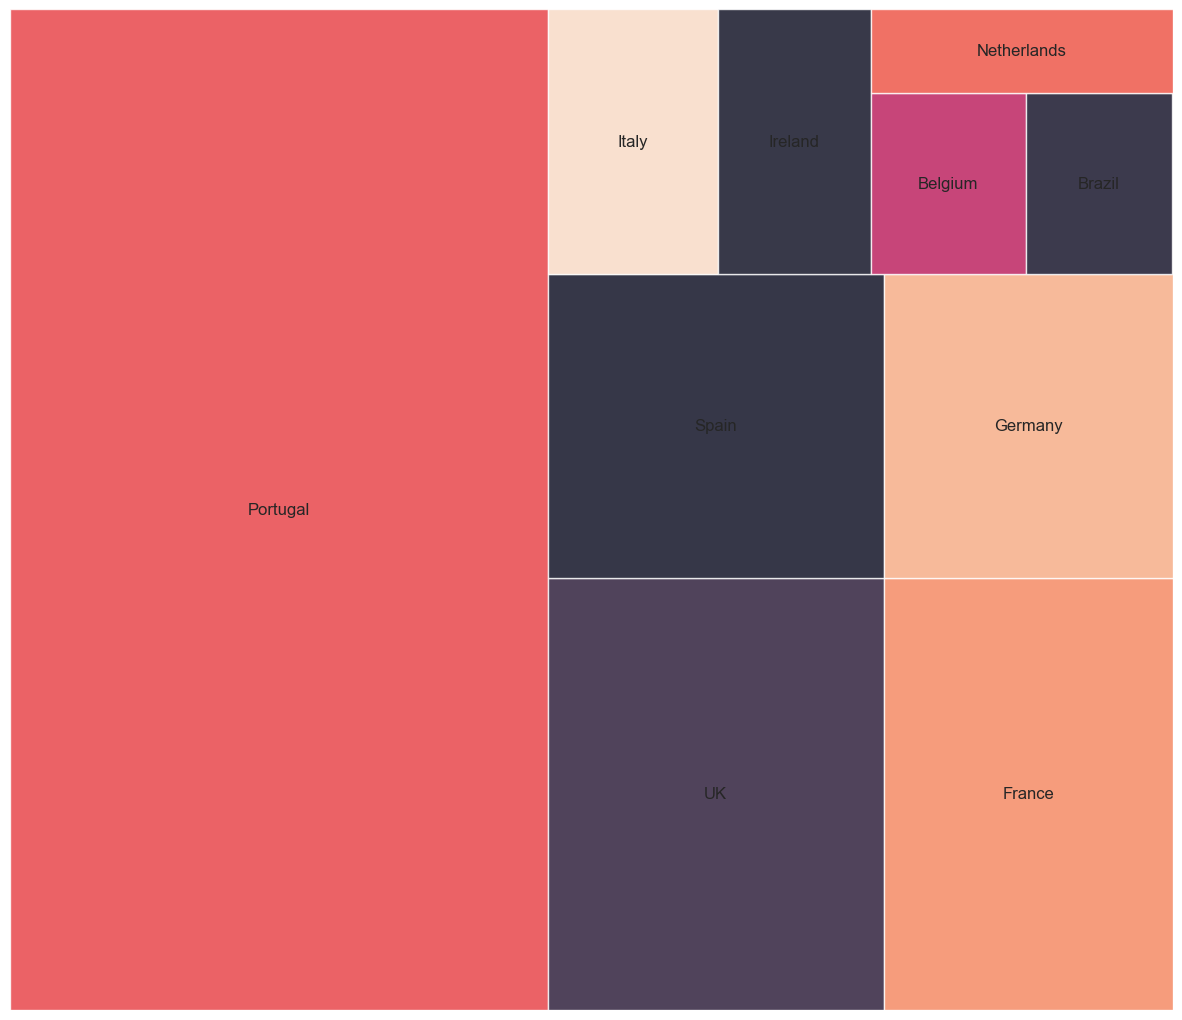

In [103]:
# Plotting a Python Treemap
squarify.plot(sizes=top_10_ft_countries["Number of Guests"].values, label=top_10_ft_countries.index, alpha=0.8)
# Removing the axis values
plt.axis('off')
# Displaying the plot
plt.show()

<b>Most of the bookings for first timers is largely driven by five (5) countries in the European Union lead by Portugal with an overall contribution of approximately 39.43%</b>

<AxesSubplot:ylabel='Country'>

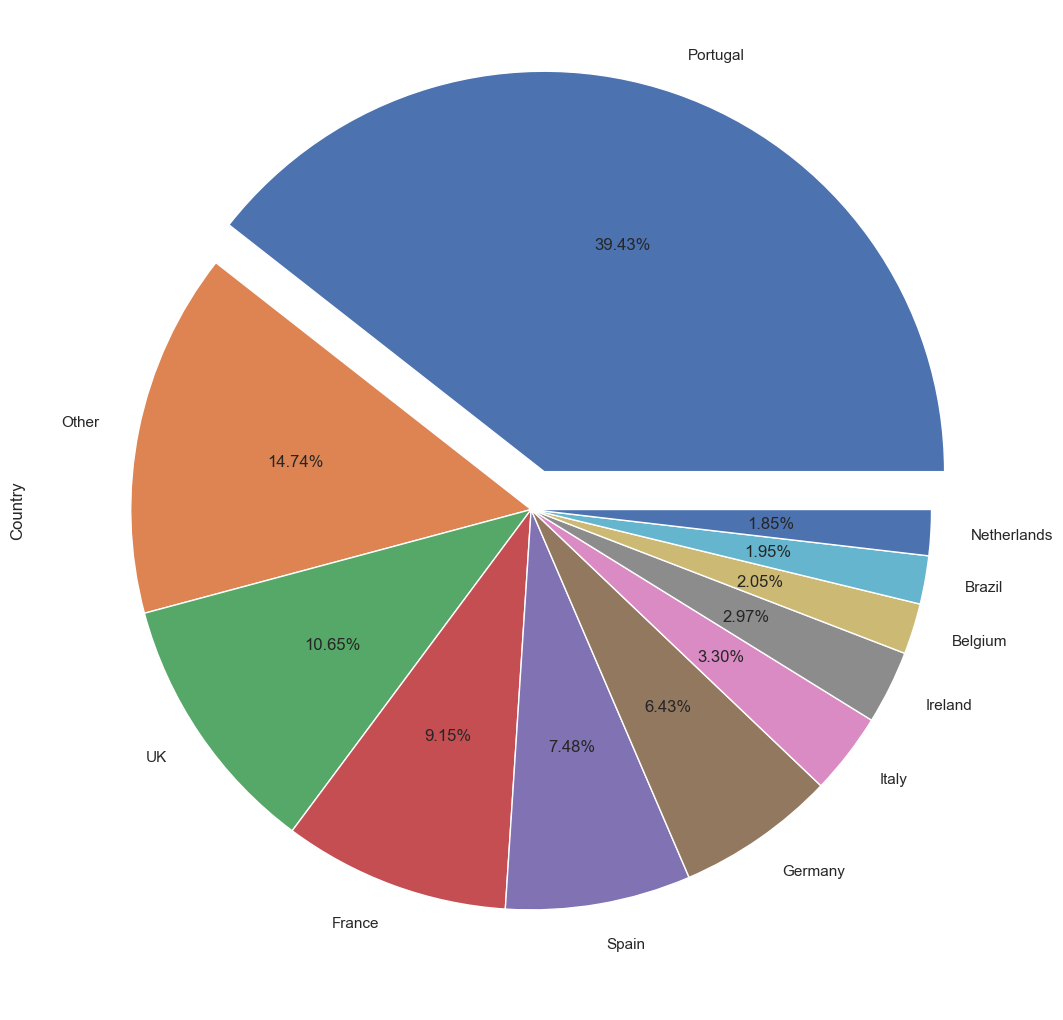

In [104]:
(first_timer_df
.Country
.pipe(topn)
.value_counts()
.plot(kind="pie", explode = [0.1, 0, 0, 0, 0,0,0,0,0,0,0], autopct = '%.02f%%')
)

### First Timers & Customer Types 

<b>Among the first timers, Transient customer type contributes nearly 75% to the overall bookings as City Hotel records ~35% more bookings than Resort Hotel.</b>

In [105]:
#Using pd.crosstab to help determine frequency between Customer_Type & Hotel 
tab = pd.crosstab(first_timer_df.Customer_Type, first_timer_df.Hotel, margins=True) # margins=True adds ALl row and column
#tab

In [106]:
first_timer_df["Hotel"].count()

112172

In [107]:
#Inserting percent columns
tab['pct_city']=round(tab["City Hotel"]*100/ first_timer_df["Hotel"].count(), 2)
tab['pct_resort']=round((tab["Resort Hotel"]*100),2) / first_timer_df["Hotel"].count()
tab['pct_all']=(round((tab["All"]*100/first_timer_df["Hotel"].count()),2))
tab =tab.sort_values(by="pct_all", ascending=False)
tab

Hotel,City Hotel,Resort Hotel,All,pct_city,pct_resort,pct_all
Customer_Type,,,,,,
All,75655,36517,112172,67.45,32.554470,100.00
Transient,56624,27382,84006,50.48,24.410726,74.89
Transient-Party,16526,7250,23776,14.73,6.463289,21.20
Contract,2273,1745,4018,2.03,1.555647,3.58
Group,232,140,372,0.21,0.124808,0.33


### Cancellations by First Timers & Customer Type

<b> Even though the Transient customer type contribute approximately 75% to the overall bookings, it contributes almost 83% of the total cancellations and exactly 75% of the first timer cancellations came from City Hotel.</b>

In [108]:
first_timer_cancelled_df=first_timer_df[first_timer_df["Booking_Status"]=="Cancelled"]
first_timer_cancelled_df.tail(2)

,Hotel,Booking_Status,Lead_Time,Arrival_Year,Arrival_Month,Arrival_Day_of_Month,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,...,ADR,Reservation_Status,Reservation_Status_Date,Country,Region,Sub-Region,Arrival_Date,Total_Guests,Total_Nights_Stayed,Revenue
88579,City Hotel,Cancelled,26,2016,June,26,2,1,2,0.0,...,152.67,Canceled,2016-06-24,Germany,Europe,Western Europe,2016-06-26,2.0,3,458.01
89102,City Hotel,Cancelled,45,2016,July,2,0,1,1,0.0,...,101.15,Canceled,2016-07-02,Portugal,Europe,Southern Europe,2016-07-02,1.0,1,101.15


In [109]:
first_timer_cancelled_df

tab1 = pd.crosstab(first_timer_cancelled_df.Customer_Type, first_timer_cancelled_df.Hotel, margins=True) # margins=True adds ALl row and column
tab1

#Inserting percent columns
tab1['pct_city']=round(tab1["City Hotel"]*100/ first_timer_cancelled_df["Hotel"].count(), 2)
tab1['pct_resort']=round((tab1["Resort Hotel"]*100),2) / first_timer_cancelled_df["Hotel"].count()
tab1['pct_all']=(round((tab1["All"]*100/first_timer_cancelled_df["Hotel"].count()),2))
tab1 =tab1.sort_values(by="pct_all", ascending=False)
tab1

Hotel,City Hotel,Resort Hotel,All,pct_city,pct_resort,pct_all
Customer_Type,,,,,,
All,32300,10788,43088,74.96,25.037133,100.00
Transient,26572,9161,35733,61.67,21.261140,82.93
Transient-Party,4612,1461,6073,10.70,3.390735,14.09
Contract,1095,153,1248,2.54,0.355087,2.90
Group,21,13,34,0.05,0.030171,0.08


Text(0, 0.5, 'Number of Cancellations')

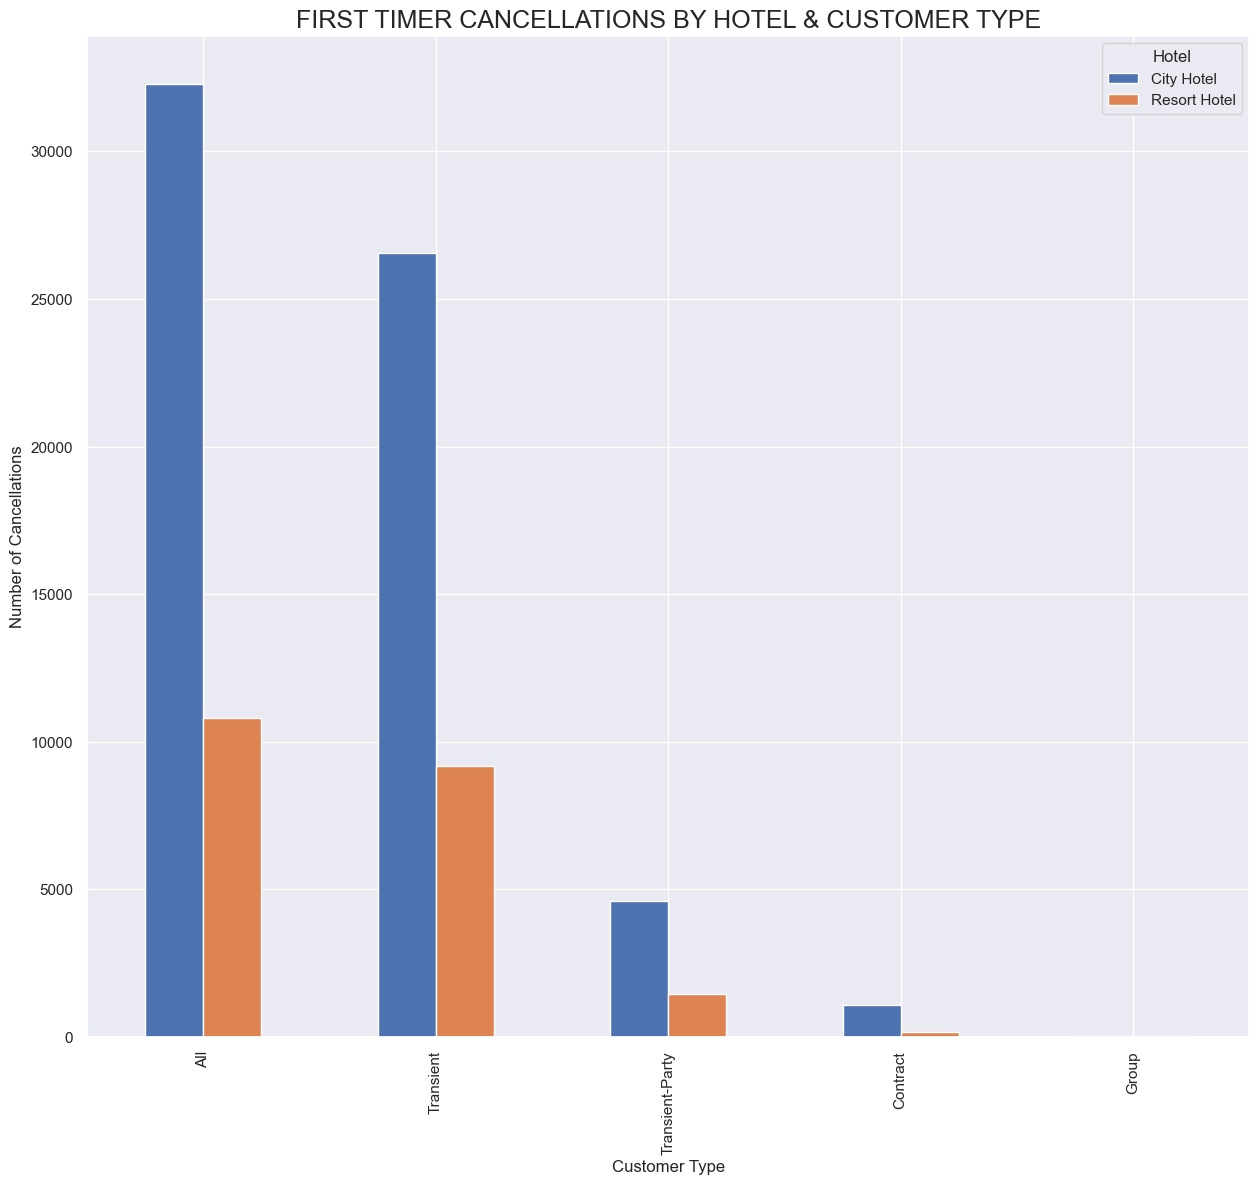

In [110]:
#pd.crosstab(first_timer_df.Customer_Type, first_timer_df.Hotel).sort_values(by="Resort Hotel").plot(kind="bar")
tab1[["City Hotel", "Resort Hotel"]].plot(kind="bar")

plt.title("FIRST TIMER CANCELLATIONS BY HOTEL & CUSTOMER TYPE", fontsize=18)
plt.xlabel("Customer Type")
plt.ylabel("Number of Cancellations")



# DEPOSIT TYPES AMONG FIRST TIMERS

<b> Bookings demand among "No Deposit" Deposit Type is very high at ~87%.</b>

In [111]:
tab2 = pd.crosstab(first_timer_df.Deposit_Type, first_timer_df.Customer_Type, margins=True)
tab2["pct_all"] = round((tab2["All"]/ (first_timer_df["Deposit_Type"].count())*100),2)

tab2

Customer_Type,Contract,Group,Transient,Transient-Party,All,pct_all
Deposit_Type,,,,,,
No Deposit,3472,366,71163,22519,97520,86.94
Non Refund,544,0,12823,1128,14495,12.92
Refundable,2,6,20,129,157,0.14
All,4018,372,84006,23776,112172,100.00


In [112]:
first_timer_df["Deposit_Type"].count()

112172

### Deposit Type & Cancellations 

<b> Interestingly, the percentage share of "Non Refund" Deposit type rose to 33% of total cancellations among first timers but it s share among overall bookings was ~12% and the contribution of "No Deposit" sharply dropped to ~67%.</b>

In [113]:
tab3=pd.crosstab(first_timer_cancelled_df.Deposit_Type, first_timer_cancelled_df.Booking_Status)
tab3["pct%"] = round((tab3["Cancelled"] *100/ 
                      first_timer_cancelled_df["Booking_Status"].count()),2)
tab3

Booking_Status,Cancelled,pct%
Deposit_Type,,
No Deposit,28645,66.48
Non Refund,14407,33.44
Refundable,36,0.08


In [114]:
tab5 = round(first_timer_cancelled_df.groupby("Deposit_Type")
        ["Booking_Status"].count() / first_timer_cancelled_df["Booking_Status"].count() * 100,2)
tab5

Deposit_Type
No Deposit    66.48
Non Refund    33.44
Refundable     0.08
Name: Booking_Status, dtype: float64

In [115]:
tab4 = round(((first_timer_df.groupby("Deposit_Type")["Booking_Status"].count() / first_timer_df.Booking_Status.count())*100),2).sort_values(ascending=False)
tab4

Deposit_Type
No Deposit    86.94
Non Refund    12.92
Refundable     0.14
Name: Booking_Status, dtype: float64

Text(0, 0.5, 'Percentage of Bookings/ Cancellations')

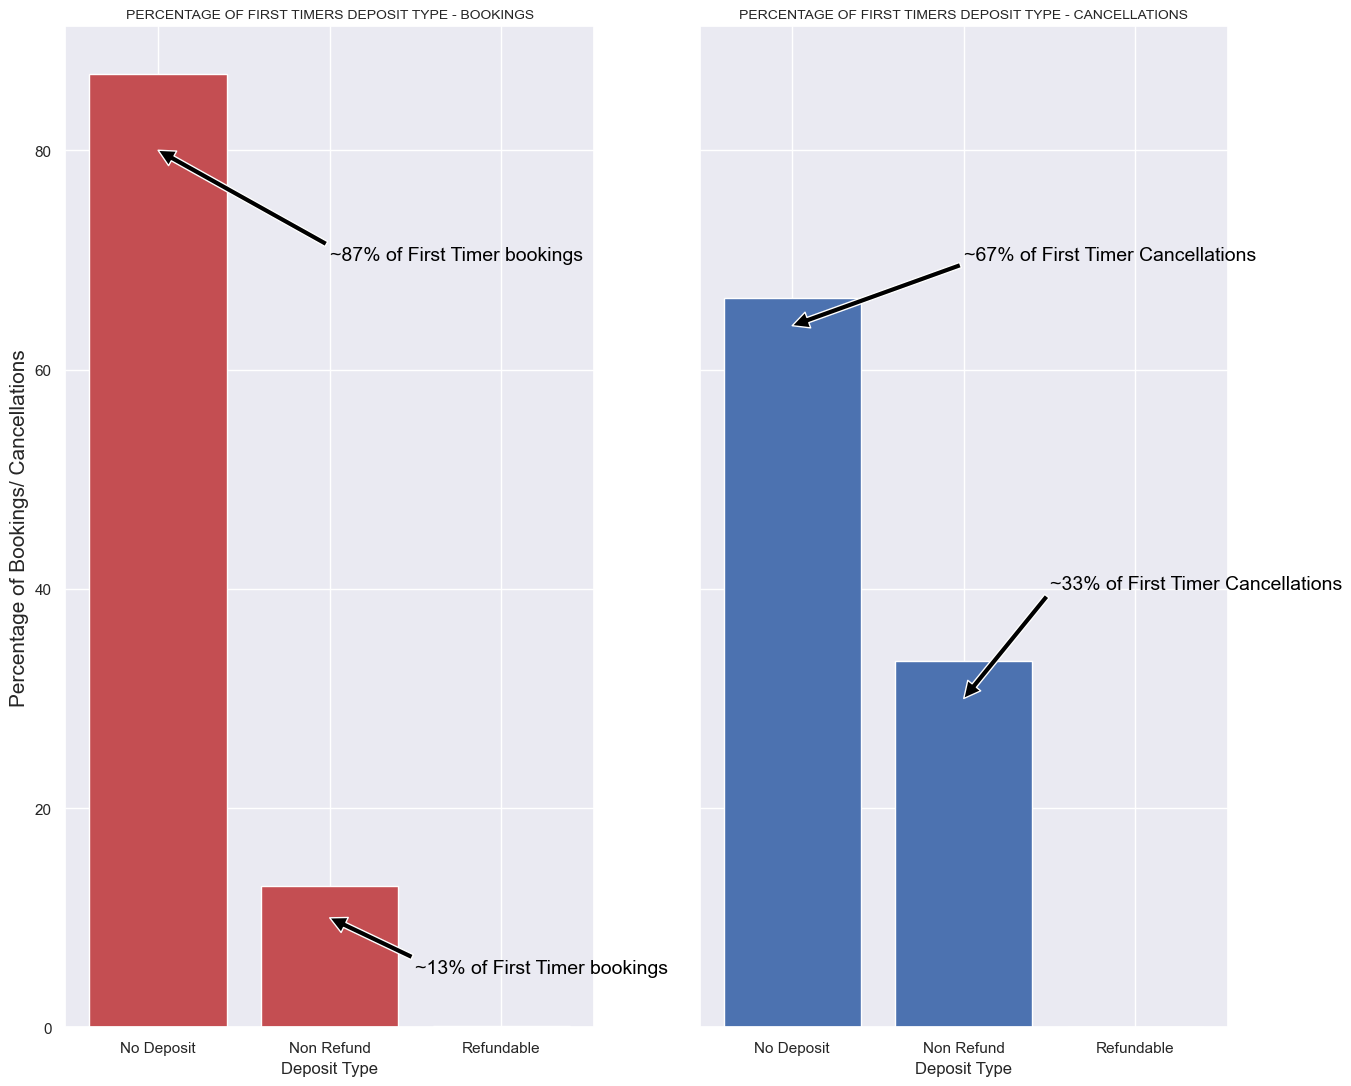

In [116]:
fig, ax=plt.subplots(1,2,sharey=True, sharex=True)
ax[0].bar(tab4.index, tab4.values, color = "r")
ax[1].bar(tab5.index, tab5.values)

ax[0].set_title("PERCENTAGE OF FIRST TIMERS DEPOSIT TYPE - BOOKINGS", fontsize=10)

ax[0].annotate("~87% of First Timer bookings", color = "black", xy=(0,80),
                fontsize= 14, xytext = (1, 70), arrowprops = dict(facecolor = "BLACK"))
ax[0].annotate("~13% of First Timer bookings", color = "black", xy=(1,10),
                fontsize= 14, xytext = (1.5, 5), arrowprops = dict(facecolor = "BLACK"))

ax[1].annotate("~67% of First Timer Cancellations", color = "black", xy=(0,64),
                fontsize= 14, xytext = (1, 70), arrowprops = dict(facecolor = "BLACK"))
ax[1].annotate("~33% of First Timer Cancellations", color = "black", xy=(1,30),
                fontsize= 14, xytext = (1.5, 40), arrowprops = dict(facecolor = "BLACK"))
    
ax[1].set_title("PERCENTAGE OF FIRST TIMERS DEPOSIT TYPE - CANCELLATIONS", fontsize=10)

ax[0].set_xlabel("Deposit Type", fontsize = 12)
ax[1].set_xlabel("Deposit Type", fontsize = 12)

ax[0].set_ylabel("Percentage of Bookings/ Cancellations", fontsize = 15)



# IMPACT OF CANCELLATIONS ON REVENUE

<b>Total Revenue Loss due to cancellations amounted to GBP 16,558,942.28, which is nearly 40% of the total potential revenue of GBP 42,035,167.77. </b>

In [117]:
bookings_data["Revenue"].sum()

42035167.77

In [118]:
print("Total Potential Revenue including cancellations for the periods under review is" + " " + "GBP" + " " + str(bookings_data["Revenue"].sum()))  

Total Potential Revenue including cancellations for the periods under review is GBP 42035167.77


In [119]:
bookings_data.groupby(["Booking_Status"])["Revenue"].sum().sort_values(ascending = False)

Booking_Status
Signed In    25476225.49
Cancelled    16558942.28
Name: Revenue, dtype: float64

<AxesSubplot:ylabel='Revenue'>

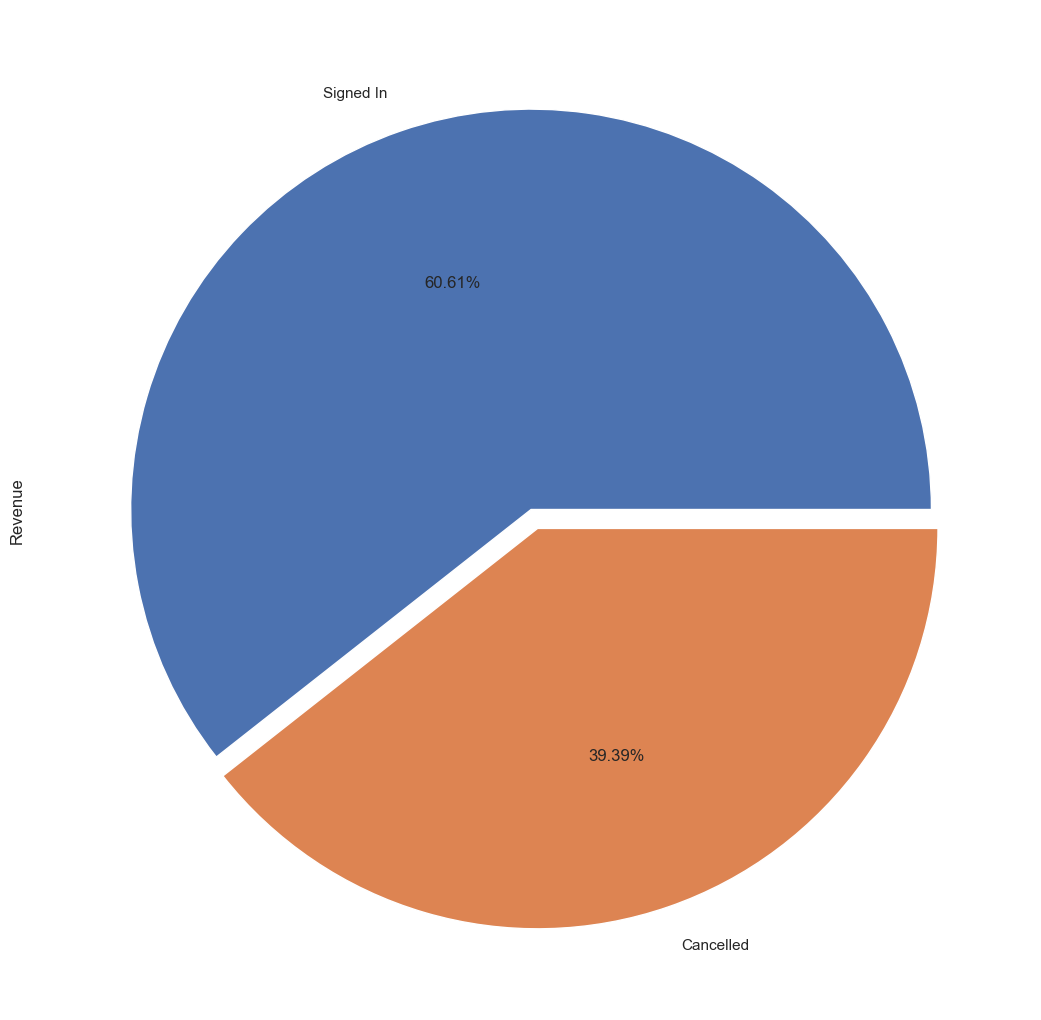

In [120]:
(bookings_data
.groupby(["Booking_Status"])["Revenue"]
.sum()
.sort_values(ascending = False)
.plot(kind="pie", explode = [0, 0.05], autopct = '%.02f%%')
)

### Revenue Losses based on Region of guest origin

<b> The European Region contributes nearly 93% (i.e. GBP 14,878,198.31) to the overall losses from cancellations.</b>

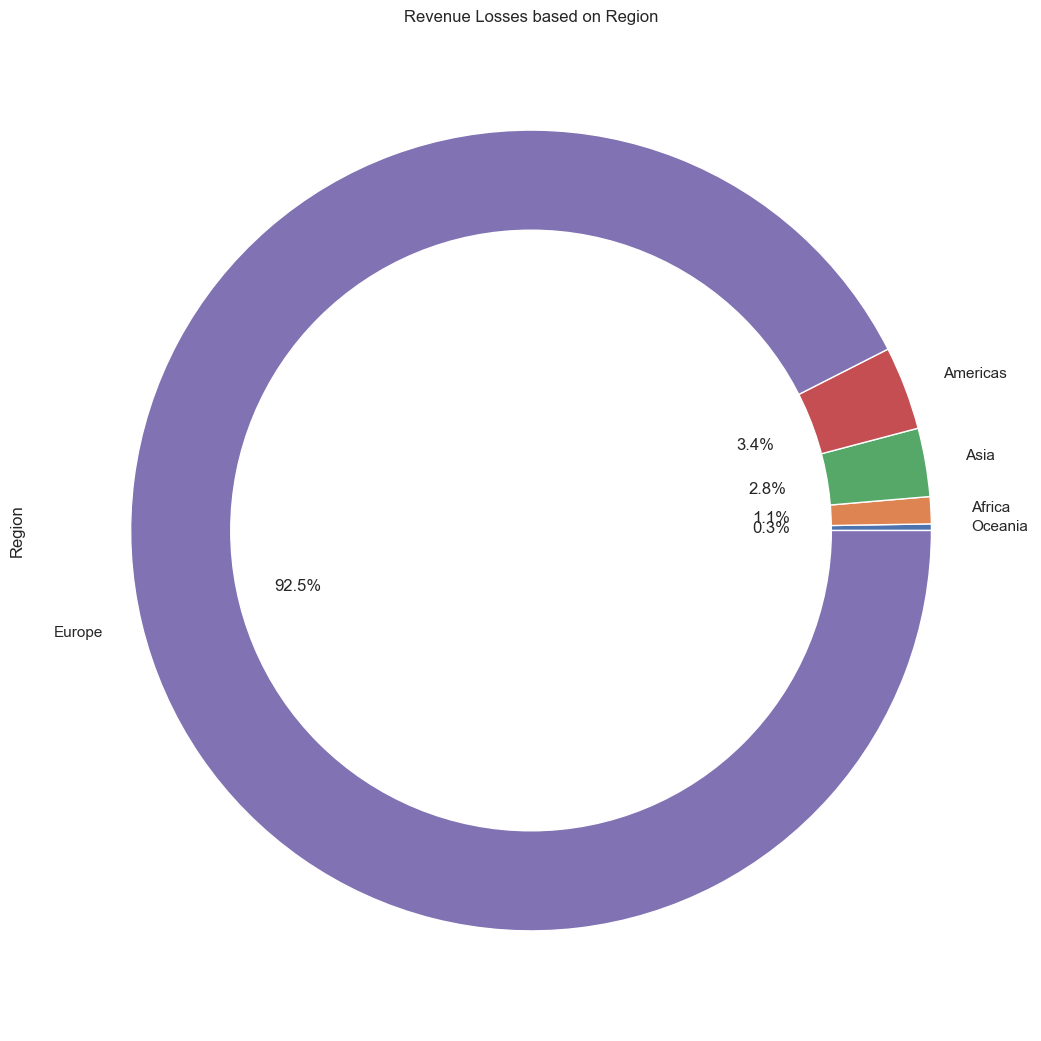

In [121]:
(cancelled_df.Region.value_counts(ascending=True)
.plot.pie(autopct = '%.01f%%',explode = [0.0, 0, 0, 0.0, 0.0] ,title="Revenue Losses based on Region"))

circle = plt.Circle(xy=(0,0), radius=0.75, facecolor="white")
plt.gca().add_artist(circle)

In [122]:
cancelled_df.groupby([ "Region"])["Revenue"].sum().sort_values(ascending=False)

Region
Europe      14878198.31
Americas      670114.40
Asia          515572.33
Africa        454082.12
Oceania        40975.12
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'REVENUE LOSSES BY REGION')

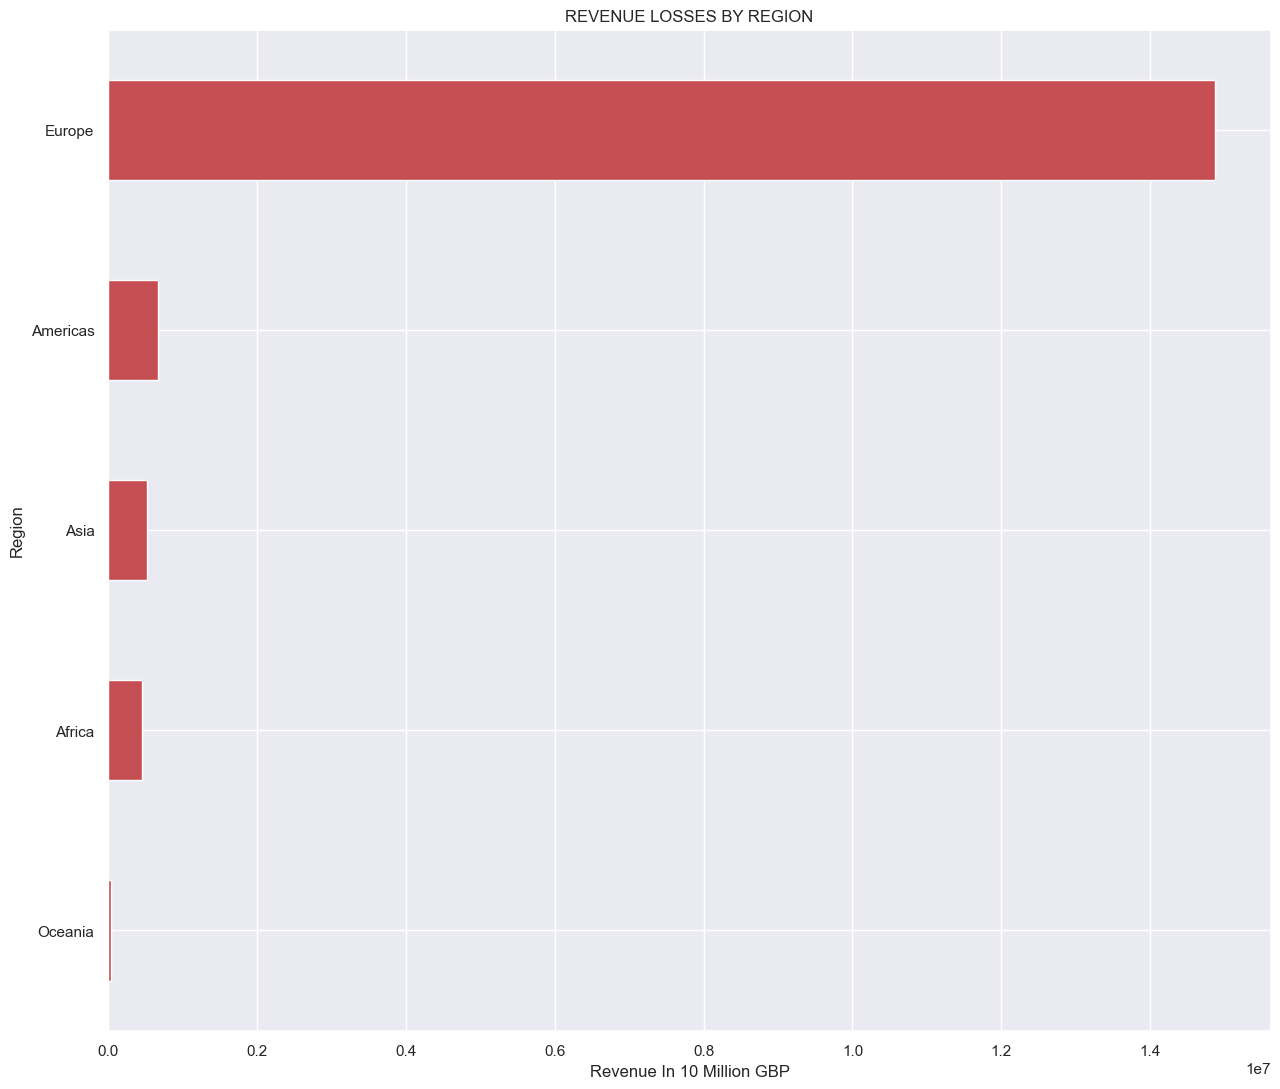

In [123]:
cancelled_df.groupby("Region")["Revenue"].sum().sort_values().plot(kind="barh", color = "r")

plt.xlabel("Revenue In 10 Million GBP")
plt.title("REVENUE LOSSES BY REGION")

### Losses in Potential revenue due to cancellation

<b> Cancellations in City Hotel (75%) is nearly three(3) times that of Resort Hotel(25%) and ~65% of the potential revenue losses is attributed to City Hotel whereas Resort Hotel is responsible for the remaining ~35% </b>

Text(0, 0.5, 'No. of Cancellations')

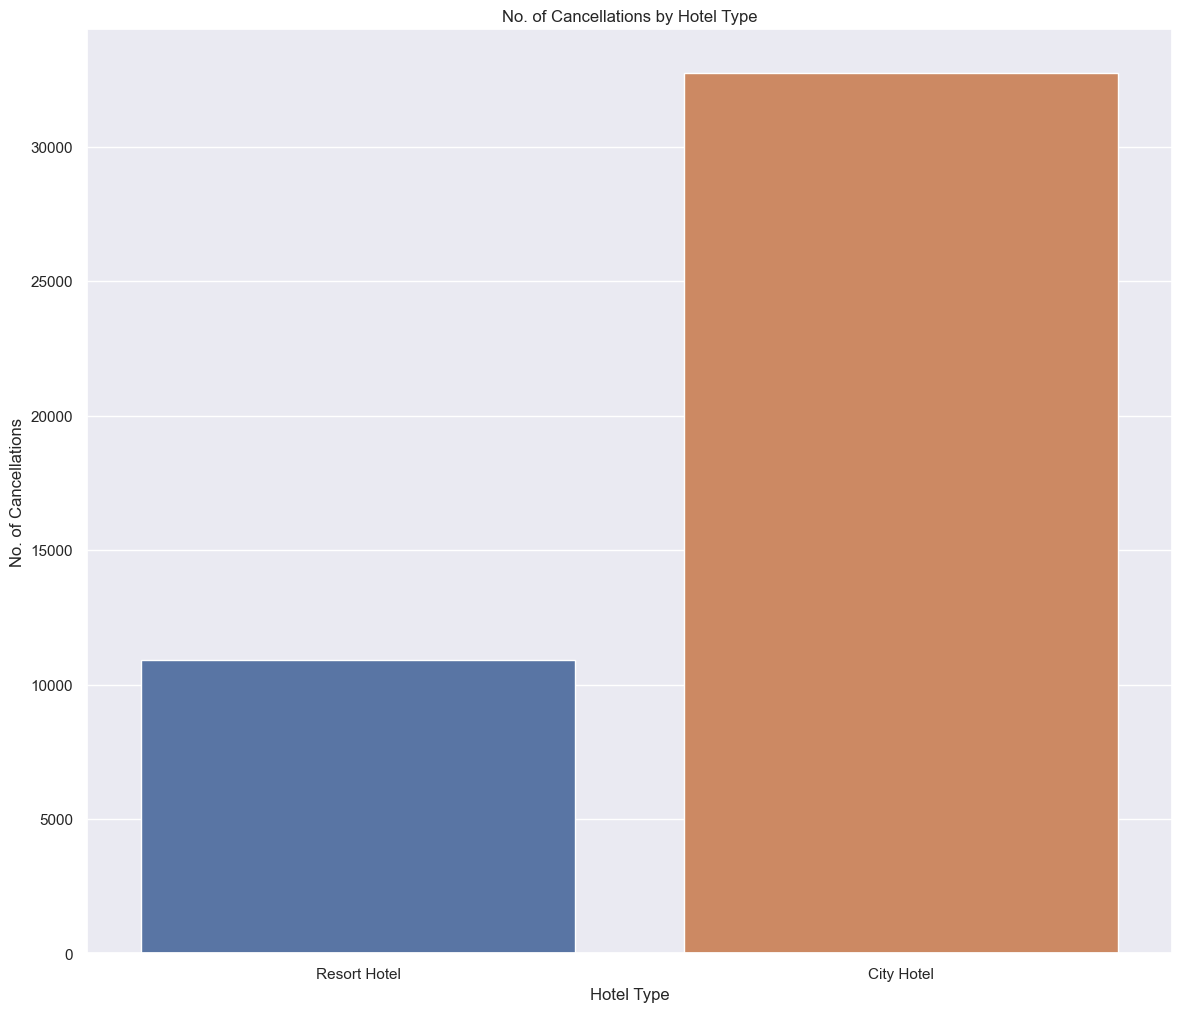

In [124]:
sns.set(rc={"figure.figsize":(14,12)})
graph = sns.countplot(x="Hotel", data=cancelled_df)
graph.set(title="No. of Cancellations by Hotel Type")
graph.set_xlabel("Hotel Type", fontsize=12)
graph.set_ylabel("No. of Cancellations", fontsize=12)


In [125]:
cancelled_df["Hotel"].value_counts() 

City Hotel      32718
Resort Hotel    10899
Name: Hotel, dtype: int64

In [126]:
round(cancelled_df["Hotel"].value_counts(normalize=True) * 100, 2)

City Hotel      75.01
Resort Hotel    24.99
Name: Hotel, dtype: float64

In [127]:
signed_in_df = bookings_data[bookings_data["Booking_Status"] == "Signed In"]
signed_in_df.head(2)


,Hotel,Booking_Status,Lead_Time,Arrival_Year,Arrival_Month,Arrival_Day_of_Month,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,...,ADR,Reservation_Status,Reservation_Status_Date,Country,Region,Sub-Region,Arrival_Date,Total_Guests,Total_Nights_Stayed,Revenue
1,Resort Hotel,Signed In,7,2015,July,1,0,1,1,0.0,...,75.0,Check-Out,2015-07-02,UK,Europe,Northern Europe,2015-07-01,1.0,1,75.0
2,Resort Hotel,Signed In,13,2015,July,1,0,1,1,0.0,...,75.0,Check-Out,2015-07-02,UK,Europe,Northern Europe,2015-07-01,1.0,1,75.0


In [128]:
cancelled_df.groupby("Hotel")["Revenue"].sum() 

Hotel
City Hotel      10787397.18
Resort Hotel     5771545.10
Name: Revenue, dtype: float64

In [129]:
round((cancelled_df.groupby("Hotel")["Revenue"].sum() / cancelled_df["Revenue"].sum()*100), 2)

Hotel
City Hotel      65.15
Resort Hotel    34.85
Name: Revenue, dtype: float64

In [130]:
print("City Hotel had cancellations amounting to" + " " + str(cancelled_df["Hotel"].value_counts()[0]) + " " + "resulting in a revenue loss of" + " " + "GBP" + " " + str(cancelled_df.groupby("Hotel")["Revenue"].sum()[0]) + " "+'which represents' + " " + 
      str(round((cancelled_df.groupby("Hotel")["Revenue"].sum() / cancelled_df["Revenue"].sum()*100), 2)[0]) + "%" + " " +"of the total revenue loss for the Group.")
print(space)
print("Also, Resort Hotel had cancellations amounting to" + " " + str(cancelled_df["Hotel"].value_counts()[1]) + " " + "resulting in a revenue loss of" + " " + "GBP" + " " + str(cancelled_df.groupby("Hotel")["Revenue"].sum()[1]) +" " +'which represents' + " " + 
      str(round((cancelled_df.groupby("Hotel")["Revenue"].sum() / cancelled_df["Revenue"].sum()*100), 2)[1]) + "%" + " " +"of the total revenue loss for the Group.")

City Hotel had cancellations amounting to 32718 resulting in a revenue loss of GBP 10787397.18 which represents 65.15% of the total revenue loss for the Group.


Also, Resort Hotel had cancellations amounting to 10899 resulting in a revenue loss of GBP 5771545.1 which represents 34.85% of the total revenue loss for the Group.


## Further Delve Into Cancellations

<b> More than 90% of the cancellations for the Group emanated from Travel Agents and Tour Operators (TA/ TO) operators recording almost 40,000 cancellations out of the total of 43,617. </b>

Text(0.5, 40000, 'Responsible for ~90% of cancellations')

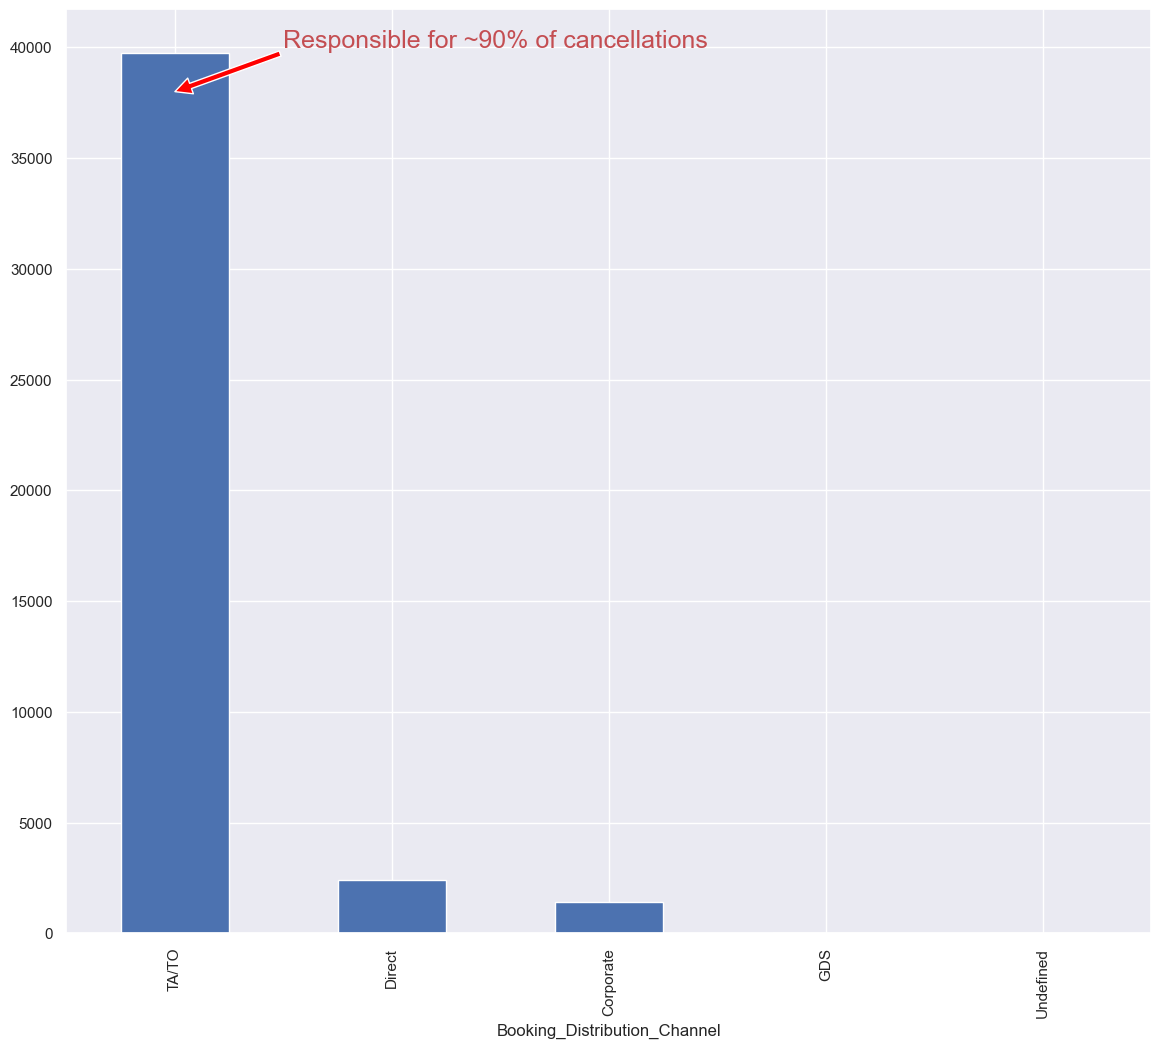

In [131]:
cancelled_df.groupby(["Booking_Distribution_Channel"])["Booking_Distribution_Channel"].count().sort_values(ascending=False).plot(kind="bar")

plt.annotate("Responsible for ~90% of cancellations", xy=(0,38000), fontsize= 18, xytext = (0.5, 40000), arrowprops = dict(facecolor = "red"), color = "r")

In [132]:
cancelled_df.groupby(["Booking_Distribution_Channel"])["Booking_Distribution_Channel"].count().sort_values(ascending=False) / cancelled_df["Booking_Distribution_Channel"].count()
cancelled_df["Booking_Distribution_Channel"].count()

43617

In [133]:
CH_cancelled_df = cancelled_df[cancelled_df["Hotel"]=="City Hotel"] 
RH_cancelled_df = cancelled_df[cancelled_df["Hotel"]=="Resort Hotel"]

In [134]:
C= (CH_cancelled_df.groupby(["Booking_Distribution_Channel"])["Revenue"].sum()).sort_values()
R= (RH_cancelled_df.groupby(["Booking_Distribution_Channel"])["Revenue"].sum()).sort_values()

In [135]:
### MARKET SEGMEMNT & DISTRIBUTION CHANNELS 

#round(((cancelled_df.groupby(['Booking_Distribution_Channel', "Hotel"])["Revenue"].sum() / cancelled_df["Revenue"].sum()).sort_values(ascending=False) * 100


Text(0.5, 0, '(Revenue Loss In Millions of GBP)')

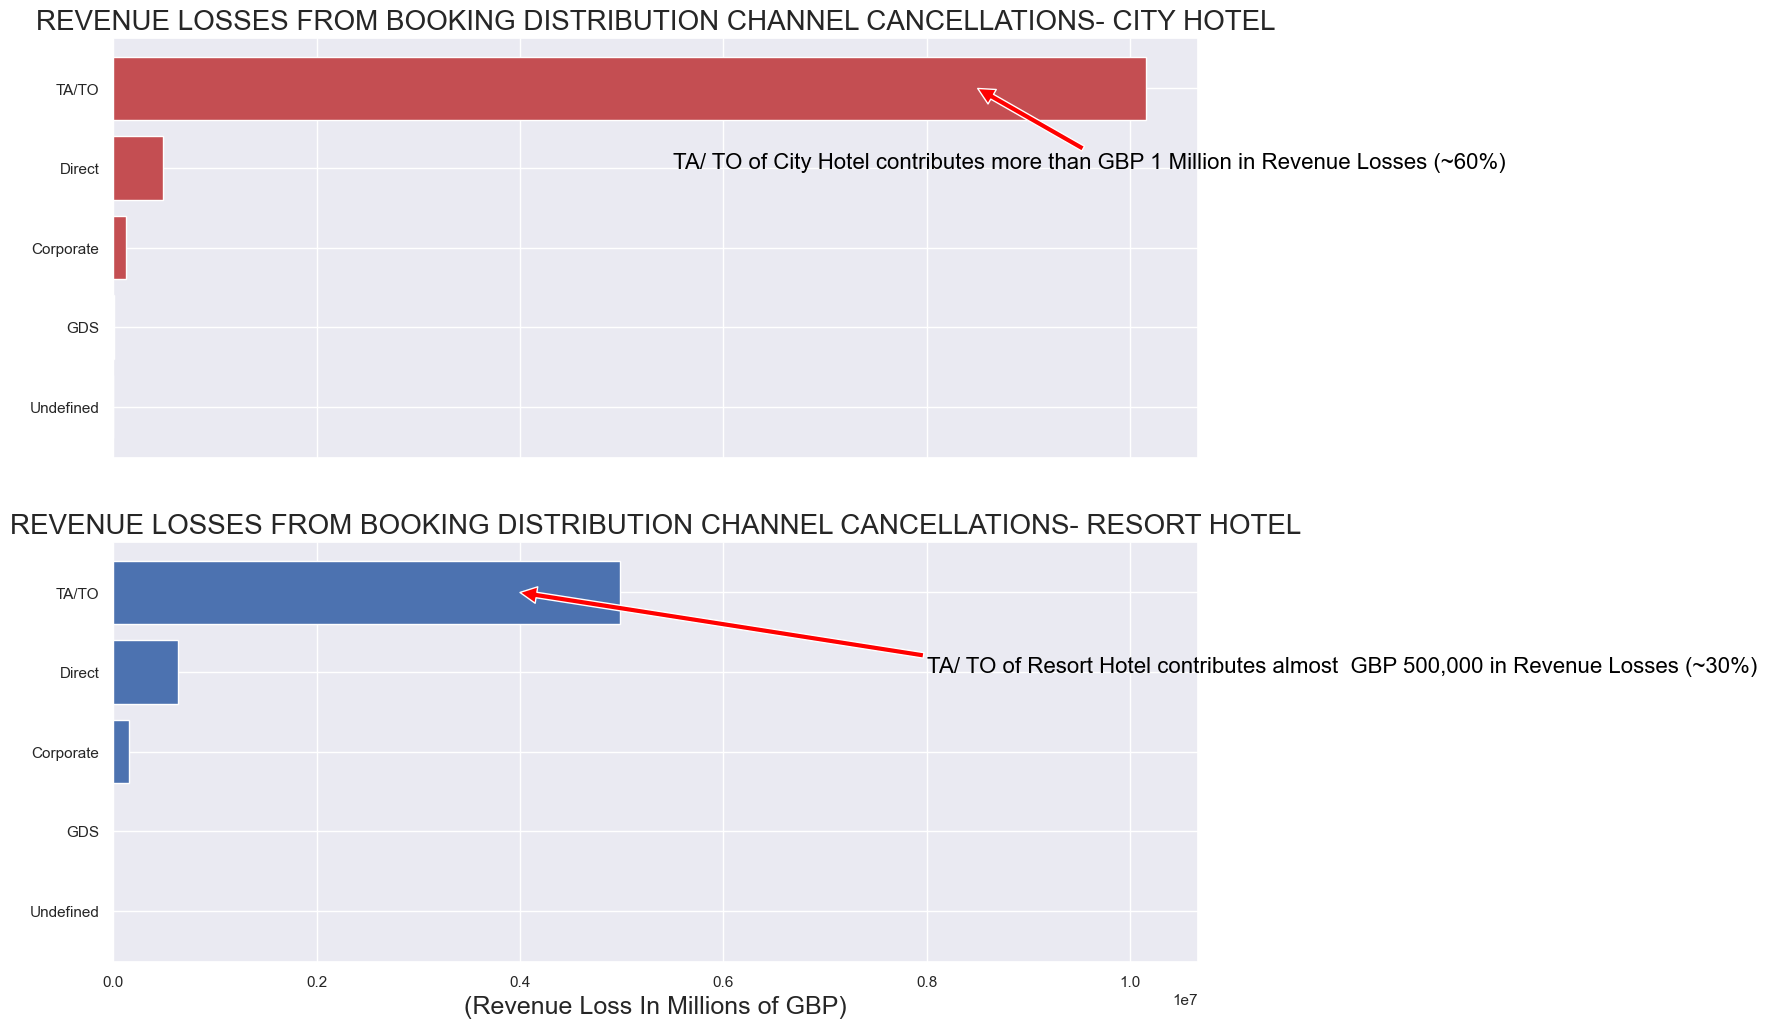

In [136]:
fig, ax=plt.subplots(2,1,sharey=True, sharex=True)
ax[0].barh(C.index, C, color = "r")
ax[1].barh(R.index, R)

ax[0].set_title("REVENUE LOSSES FROM BOOKING DISTRIBUTION CHANNEL CANCELLATIONS- CITY HOTEL", fontsize=20)

ax[0].annotate("TA/ TO of City Hotel contributes more than GBP 1 Million in Revenue Losses (~60%)", color = "black", xy=(8500000,4),
                fontsize= 16, xytext = (5500000, 3), arrowprops = dict(facecolor = "red"))



ax[1].annotate("TA/ TO of Resort Hotel contributes almost  GBP 500,000 in Revenue Losses (~30%)", color = "black", xy=(4000000,4),
                fontsize= 16, xytext = (8000000, 3), arrowprops = dict(facecolor = "red"))
ax[1].set_title("REVENUE LOSSES FROM BOOKING DISTRIBUTION CHANNEL CANCELLATIONS- RESORT HOTEL", fontsize=20)

ax[1].set_xlabel("(Revenue Loss In Millions of GBP)", fontsize = 18)



# MONTHLY REVENUE TREND ANALYSIS

 <b> Though City Hotel had higher numbers in terms of arrivals and revenues, in each year in August when revenue is at its peak, the revenue of Resorts Hotel exceeds that of City Hotel.</b>

In [137]:
#Creating a new monthly DataFrame

monthly_df = signed_in_df.groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "M")).sum()
# monthly_df.tail(2)

<b>The Group recorded its lowest revenue in January 2016 (GBP 260,055) whilst the highest was recorded in August 2017 (GBP 1,928,750.75).</b>

In [138]:
monthly_df[monthly_df["Revenue"] == monthly_df["Revenue"].min()]

,Lead_Time,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,babies,previous_cancellations,days_in_waiting_list,ADR,Total_Guests,Total_Nights_Stayed,Revenue
Arrival_Date,,,,,,,,,,,,
2016-01-31,33157,1110,2965,2653,68.0,22,249,4135,102454.11,2743.0,4075,260055.82


In [139]:
monthly_df[monthly_df["Revenue"] == monthly_df["Revenue"].max()]

,Lead_Time,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,babies,previous_cancellations,days_in_waiting_list,ADR,Total_Guests,Total_Nights_Stayed,Revenue
Arrival_Date,,,,,,,,,,,,
2017-08-31,386269,3176,8644,5995,689.0,38,22,0,487845.54,6722.0,11820,1928750.75


[Text(0.5, 1.0, 'MONTHLY REVENUE TREND (2015-2017)'),
 Text(0.5, 0, 'Arrival Year & Month'),
 Text(0, 0.5, 'Revenue in Millions (GBP)')]

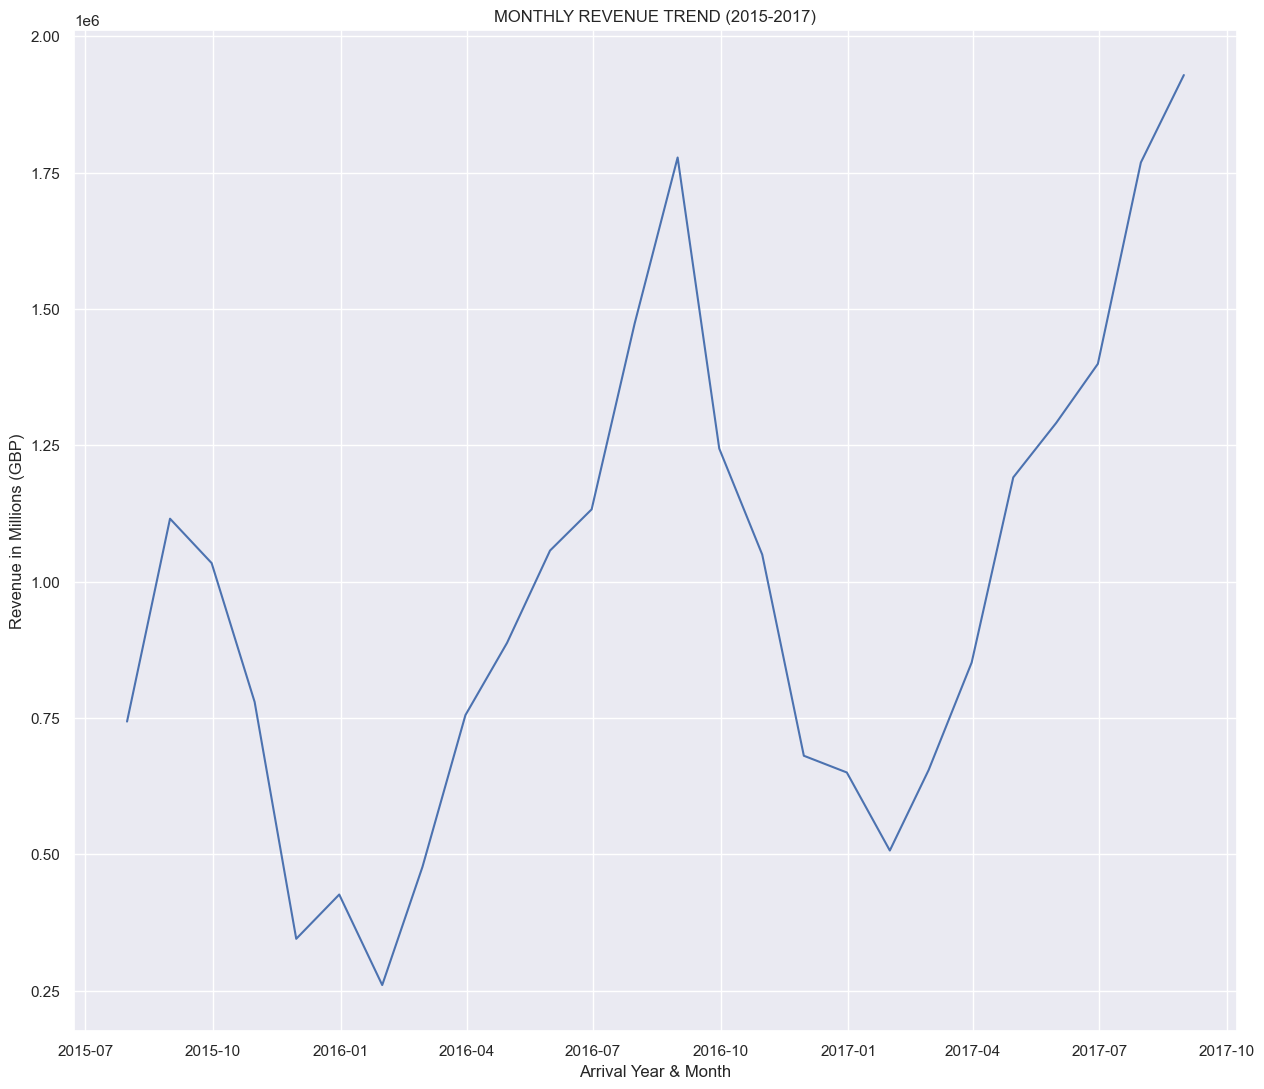

In [140]:
#Ploting the overall revenue trend for the group

sns.set(rc={"figure.figsize": (15,13)})
fig, ax = plt.subplots()

#Fixing a line plot for total number of guests for each month for City 
sns.lineplot(
           data = signed_in_df.groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "M")).sum().reset_index(),
            x= "Arrival_Date",
            y= "Revenue")

ax.set(title = "MONTHLY REVENUE TREND (2015-2017)", xlabel= "Arrival Year & Month", ylabel = "Revenue in Millions (GBP)")


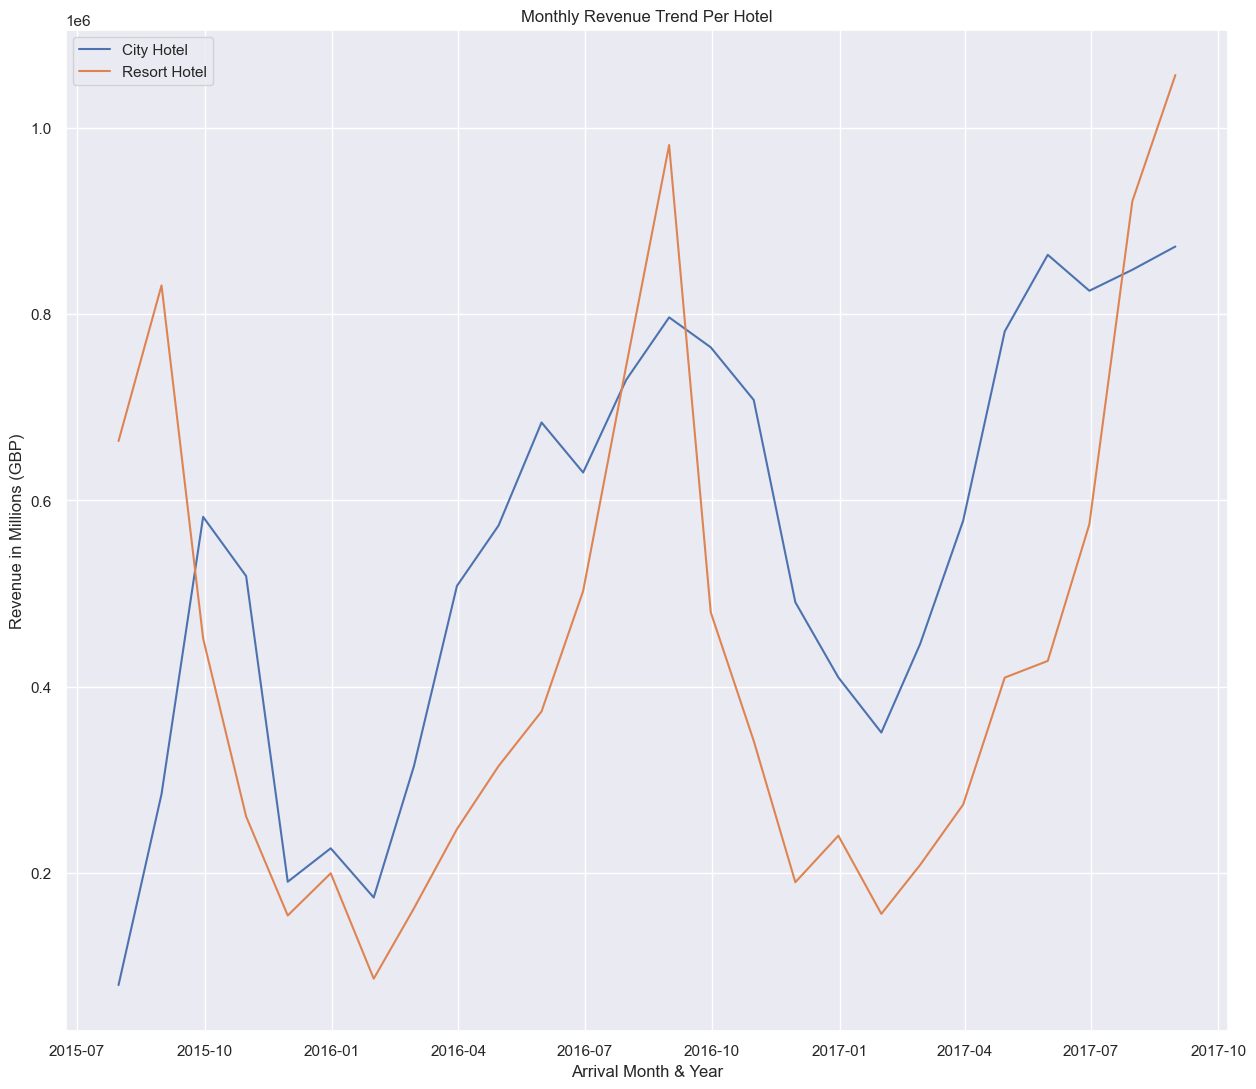

In [141]:
sns.set(rc={"figure.figsize": (15,13)})
fig, ax = plt.subplots()

#Fixing a line plot for total number of guests for each month for City 
sns.lineplot(
           data = signed_in_df[signed_in_df["Hotel"]=="City Hotel"].groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "M")).sum().reset_index(),
            x= "Arrival_Date",
            y= "Revenue",
            ax = ax
           )


#Fixing a line plot for total number of guests for each month for Resort  
sns.lineplot(
           data = signed_in_df[signed_in_df["Hotel"]=="Resort Hotel"].groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "M")).sum().reset_index(),
            x= "Arrival_Date",            
            y= "Revenue", 
            ax = ax
           )

#set label names
ax.set(title = "Monthly Revenue Trend Per Hotel", xlabel= "Arrival Month & Year", ylabel = "Revenue in Millions (GBP)")
plt.legend(labels=["City Hotel","Resort Hotel"])


In [142]:
signed_in_df.groupby(["Arrival_Year","Arrival_Month"])["Revenue"].sum().sort_values(ascending=False)

Arrival_Year  Arrival_Month
2017          August           1928750.75
2016          August           1777582.13
2017          July             1768407.58
2016          July             1473082.50
2017          June             1399193.16
              May              1291009.37
2016          September        1243923.88
2017          April            1190979.32
2016          June             1132381.20
2015          August           1115230.60
2016          May              1056807.64
              October          1049376.19
2015          September        1033827.68
2016          April             887548.28
2017          March             851425.06
2015          October           779205.99
2016          March             755069.56
2015          July              743234.21
2016          November          680537.09
2017          February          654471.52
2016          December          649852.50
2017          January           506735.23
2016          February          476639.26
2015  

In [143]:
mean_monthly_df = signed_in_df.groupby(pd.Grouper(key= "Arrival_Date", axis=0, freq = "D")).mean()
mean_monthly_df.tail(2)

,Lead_Time,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,babies,previous_cancellations,days_in_waiting_list,ADR,Total_Guests,Total_Nights_Stayed,Revenue
Arrival_Date,,,,,,,,,,,,
2017-08-30,89.981818,0.545455,3.436364,1.927273,0.163636,0.018182,0.018182,0.0,145.190545,2.109091,3.981818,582.114727
2017-08-31,99.917647,0.752941,3.305882,2.023529,0.082353,0.000000,0.000000,0.0,146.180706,2.105882,4.058824,574.306471


### ANALYSIS ON PRICING/ ADR  

<b>The modal ADR for the Group is GBP 65 but that of Resort is GBP 45 whilst that of City is GBP 80</b>

In [144]:
adr = bookings_data
adr_df =  bookings_data["ADR"]

In [145]:
#Removing ADR Outliers
adr_Median = adr_df.quantile(q=0.5).round(2)
adr_Q1 = adr_df.quantile(q=0.25).round(2)
adr_Q3 = adr_df.quantile(q=0.75).round(2)
adr_IQR = (adr_Q3-adr_Q1).round(2)

 
low_lim = adr_Q1 - 1.5 * adr_IQR
up_lim = adr_Q3 + 1.5 * adr_IQR
print('low_limit is', low_lim)

print('up_limit is', up_lim)

print("Therefore the range for plotting the histogram for the ADR is from", (low_lim), "to",  (up_lim) )

low_limit is -11.5
up_limit is 208.5
Therefore the range for plotting the histogram for the ADR is from -11.5 to 208.5


In [146]:
adr_hist_df = signed_in_df[(signed_in_df["ADR"] >= -11.5) & (signed_in_df["ADR"]<=208.5)]

adr_hist_df.head(2)
adr_hist_df["ADR"].describe()

#Count reduced after outliers

count    69315.000000
mean        97.515372
std         38.963193
min          0.260000
25%         68.610000
50%         92.000000
75%        121.430000
max        208.500000
Name: ADR, dtype: float64

<AxesSubplot:xlabel='ADR', ylabel='Count'>

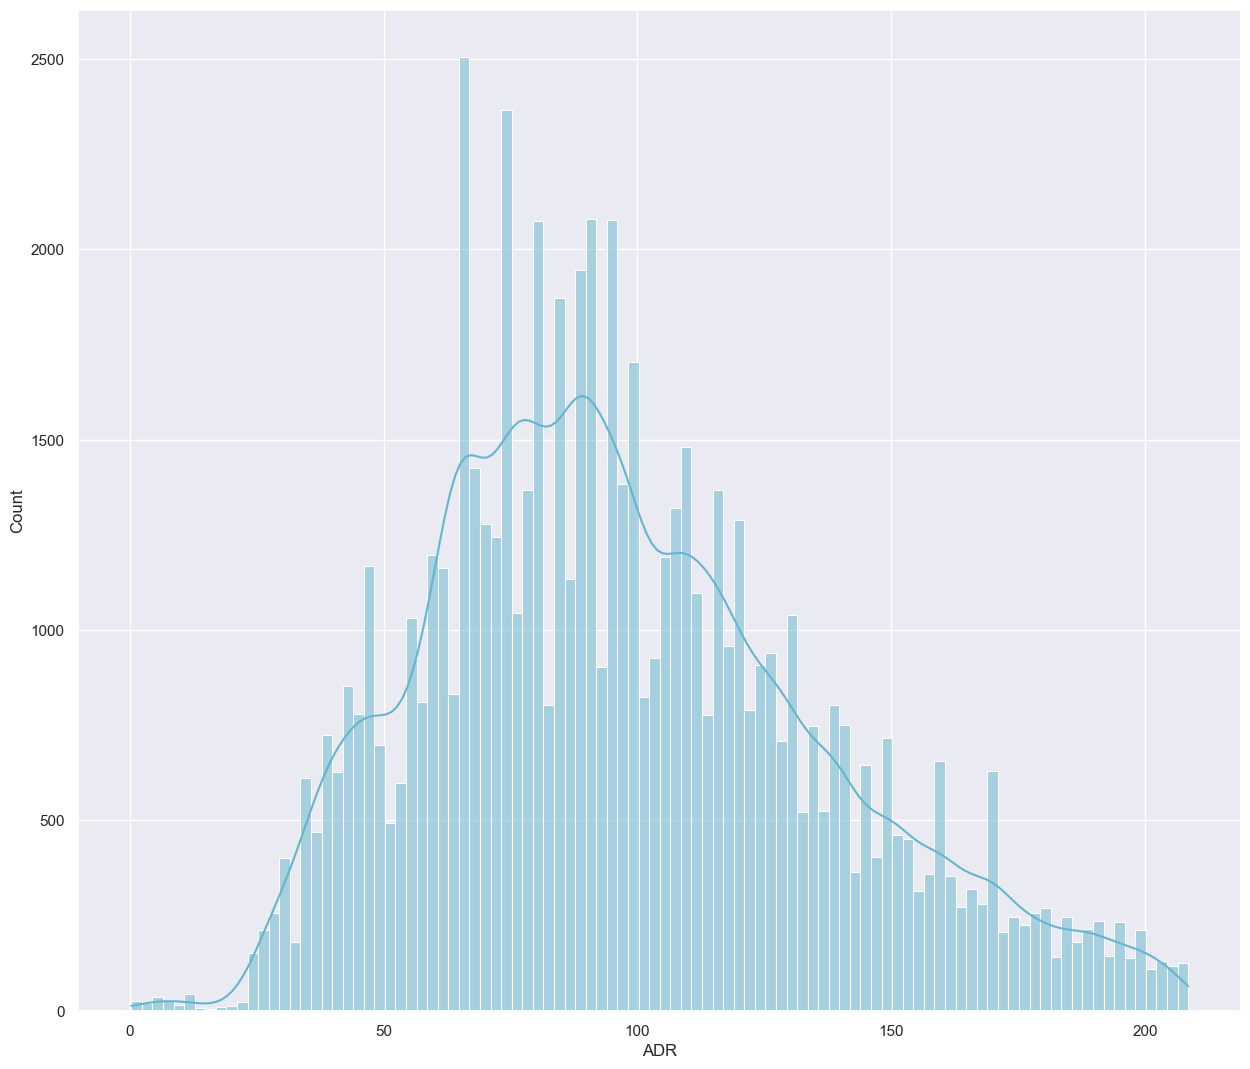

In [147]:
sns.histplot(data=adr_hist_df, x="ADR", bins= 100,kde=True, color="c")

In [148]:
adr_hist_df["ADR"].mode()

0    65.0
Name: ADR, dtype: float64

<b>ADR of Resort Hotel is skewed to the left or postively skewed as compared to ADR of City Hotel.</b>

<AxesSubplot:xlabel='ADR', ylabel='Count'>

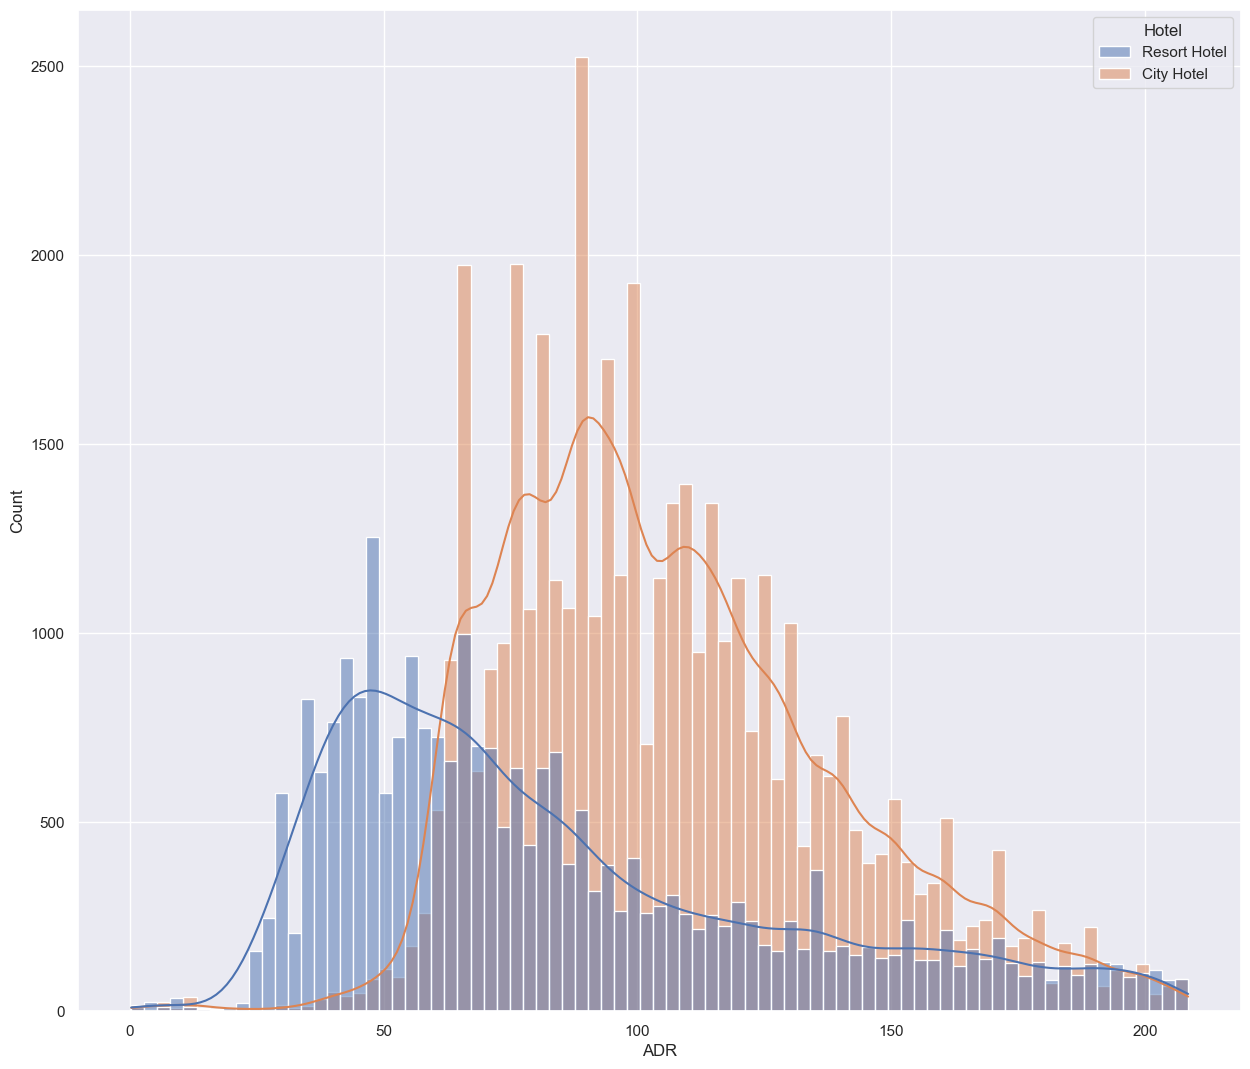

In [149]:
sns.histplot(data=adr_hist_df, x="ADR", hue ="Hotel", kde=True)

### Most Popular Room Type

<b> Room type A is the most popular among guests accounting for over 70% of the total reservations (City-53%, Resoort-19).</b>

In [150]:
bookings_data.groupby(['reserved_room_type', "Hotel"])["Booking_Status"].count() / bookings_data["Booking_Status"].count() *100

reserved_room_type  Hotel       
A                   City Hotel      53.027245
                    Resort Hotel    19.192619
B                   City Hotel       0.756270
                    Resort Hotel     0.002599
C                   City Hotel       0.009529
                    Resort Hotel     0.772729
D                   City Hotel       9.995235
                    Resort Hotel     6.234678
E                   City Hotel       1.284706
                    Resort Hotel     4.105341
F                   City Hotel       1.513406
                    Resort Hotel     0.895742
G                   City Hotel       0.364707
                    Resort Hotel     1.332352
H                   Resort Hotel     0.507645
L                   Resort Hotel     0.005198
Name: Booking_Status, dtype: float64

<AxesSubplot:xlabel='reserved_room_type', ylabel='Count'>

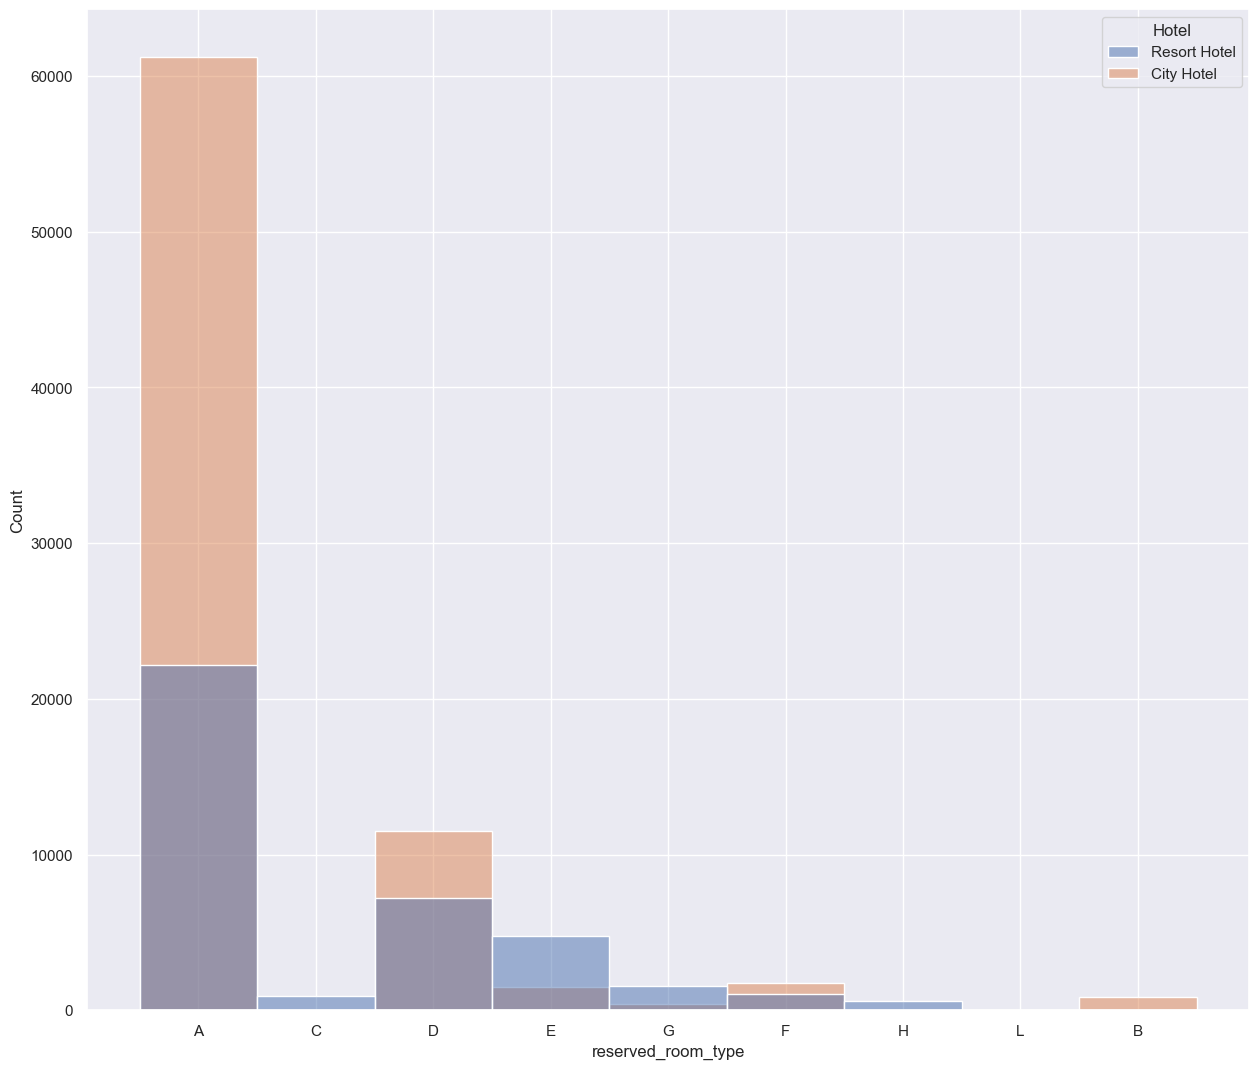

In [151]:
sns.histplot(data=bookings_data, x="reserved_room_type", hue ="Hotel")


<b> Room type A in City Hotel which accounts for ~53% of the total reservations has the lowest median across all rooms in both hotels.</b>

<AxesSubplot:xlabel='reserved_room_type', ylabel='ADR'>

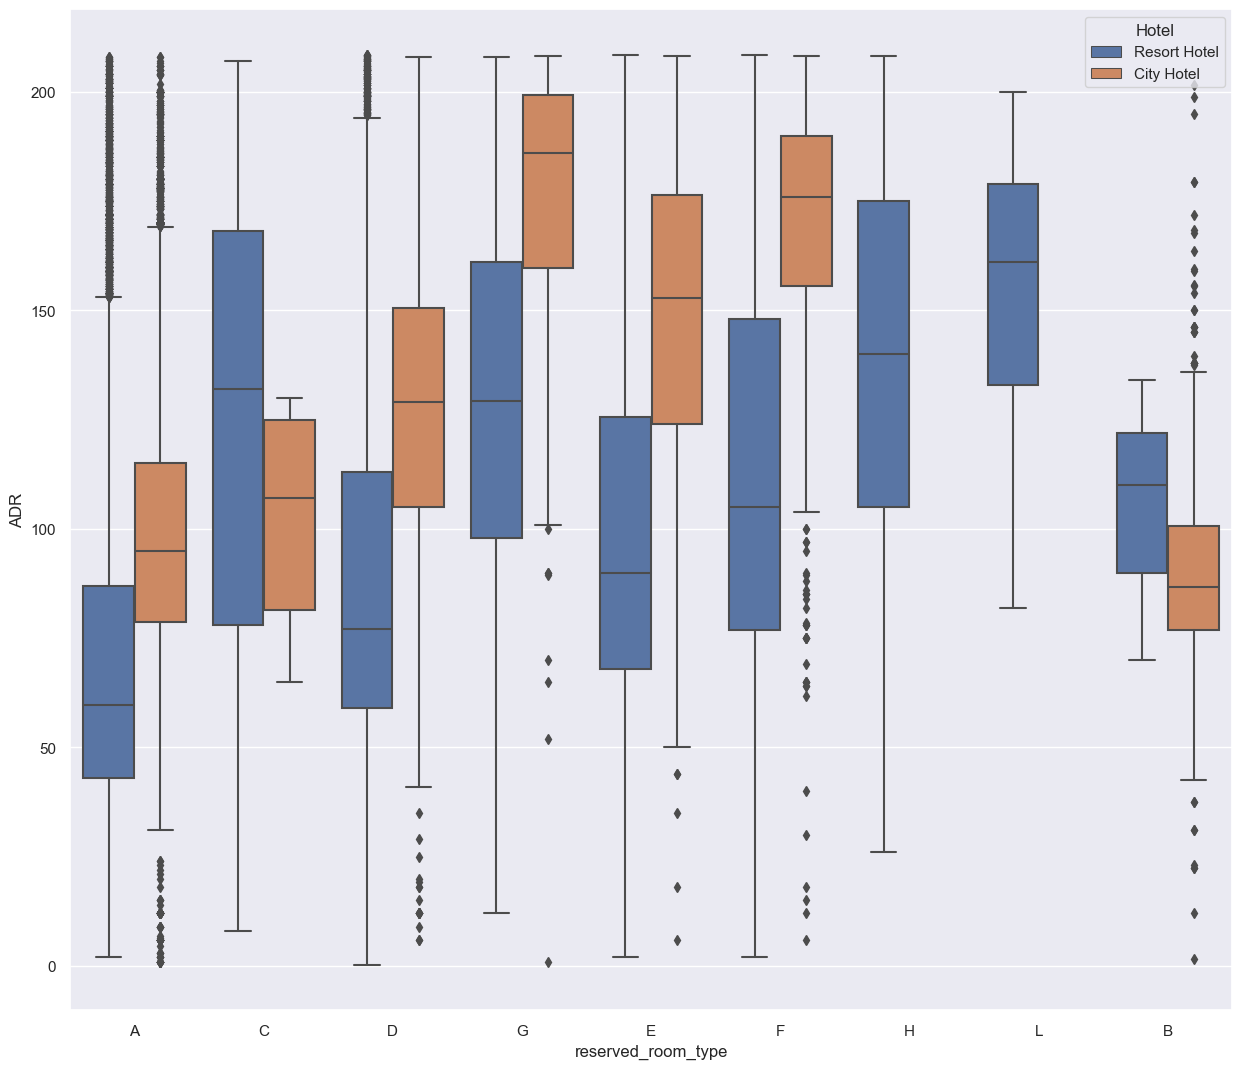

In [152]:
sns.boxplot(x= 'reserved_room_type', y= "ADR", hue="Hotel", data=adr_hist_df)

# VARIABLE CORRELATION

On Correlation, I primarily focus on Revenue and previous cancellations (initially used as proxy for cancellations) and their relationship with the other variables in the dataset.

<b> Previous cancellations and days in wait list had a negative impact on direction whilst lead time and days in wait list were positively correlated with previous cancellations.</b>

<AxesSubplot:>

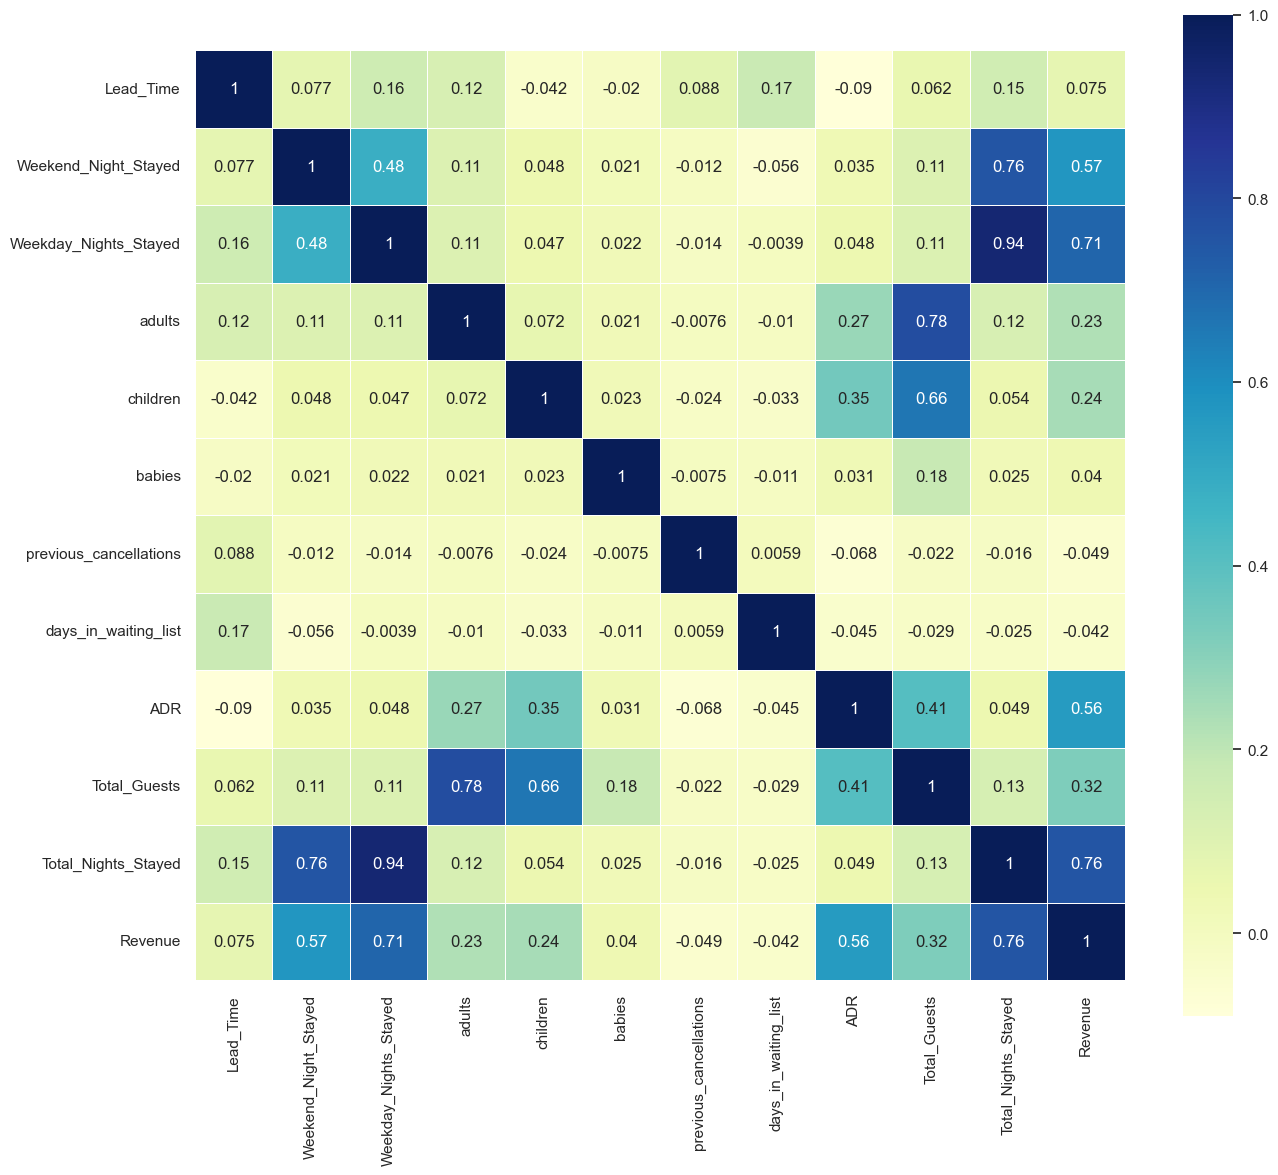

In [153]:
sns.heatmap(bookings_data.corr(), square=True, cmap="YlGnBu", annot=True, linewidths=.6)

### EFFECT OF LEAD TIME ON CANCELLATIONS

<b> Lead time which is the number of days that elapsed between time of booking and the arrival date has a positive relationship with the number of cancellations. That is, the higher the average lead time, the higher the number of cancellations.</b>

In [154]:
a=(bookings_data[bookings_data["Booking_Status"]=="Cancelled"].groupby(["Arrival_Date"])["ADR"].count())
b = (bookings_data.groupby("Arrival_Date")["Lead_Time"].mean())

r = (bookings_data.groupby("Arrival_Date")["Revenue"].sum())

ab = pd.DataFrame([a, b, r])



ab=ab.transpose()

ab.rename(columns={"ADR": "Cancellations", 
                        "Lead_Time":"Average_Lead_Time"
                              }, inplace=True)


#ab.head(2)

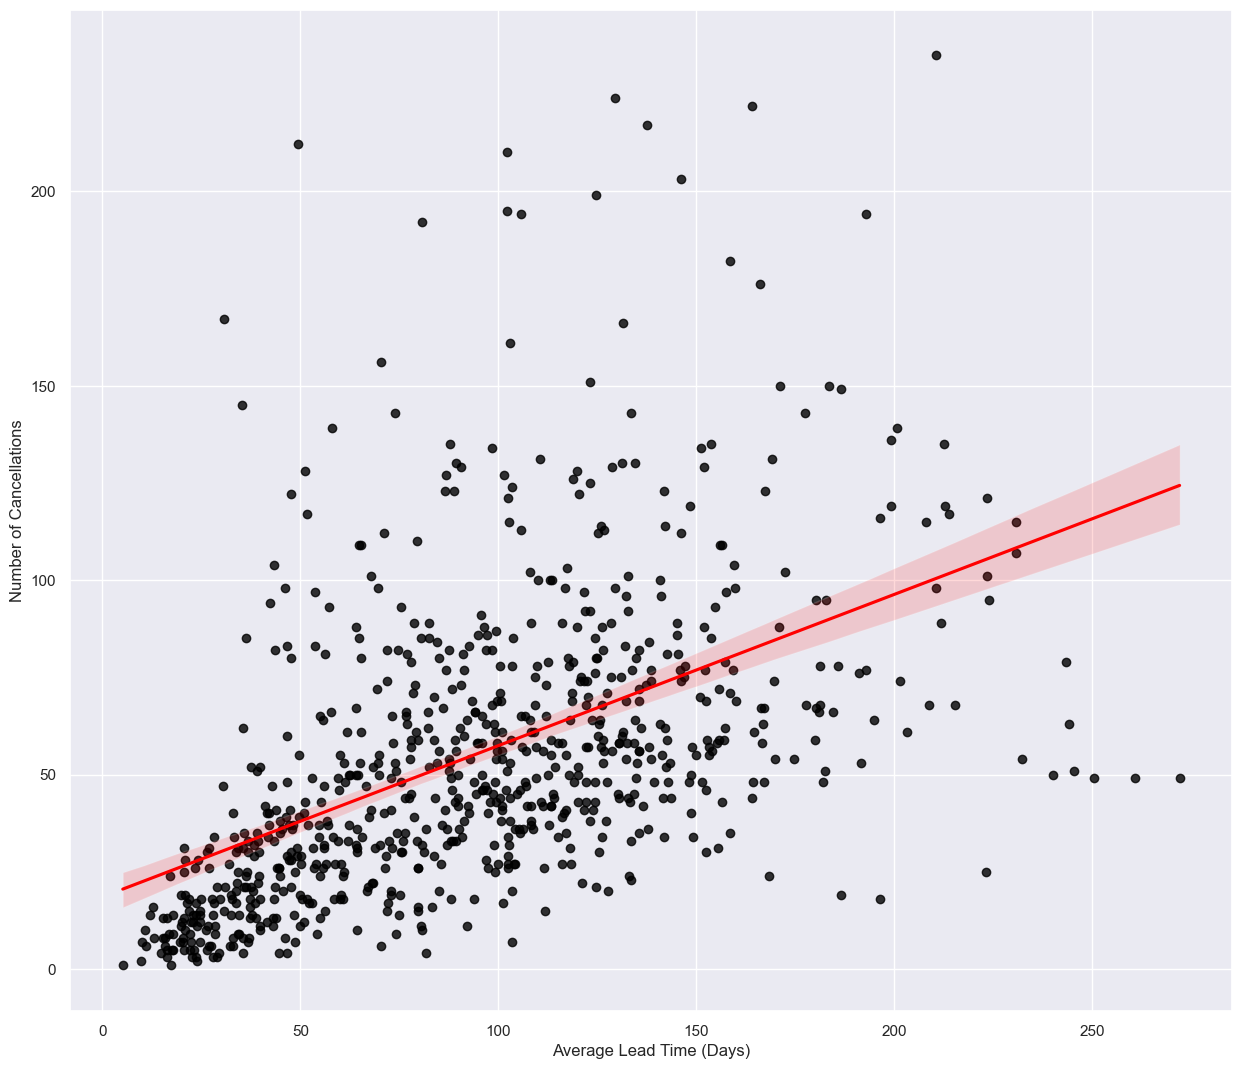

In [155]:

graph = sns.regplot(x="Average_Lead_Time", y="Cancellations", data=ab,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})
graph.set(xlabel='Average Lead Time (Days)', ylabel='Number of Cancellations')

plt.show()

## SUMMARY CONCLUSION ON EDA


<b> After the analysis, for the period under review, the following are summary conclusions:

1.  Most of The Groups Occupancy is mainly driven by first timers. Management must work towards ensuring high retention levels.. Management must devise and institute  measures to retain First timers. They must be given a wonderful experience in order to increase the client base of both hotels. 

2. City Hotel has nearly twice the amount of bookings as compared to Resort Hotel.

3. a) Cancellations is very high in City hotel as compared to Resort Hotel 
   b) Thus, potential revenue losses is very at City Hotel.
   
4. Bookings and reservations for both Hotels are steadily busy between March and October but ultimately peaks in August.

5. Most of the bookings are by couples or 2 adults.
    
6. In each year when Revenue is at its peak (mostly in or around August), Revenue in Resorts Hotel Exceeds that of City Hotel even though City mostly has higher bookings/ reservations. 

7. Higher lead time implies higher probability of cancellation.

</b>


# APPENDIX

In [156]:
all_countries_sliced

,name,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia
...,...,...,...,...
244,Wallis and Futuna,WLF,Oceania,Polynesia
245,Western Sahara,ESH,Africa,Northern Africa
246,Yemen,YEM,Asia,Western Asia
247,Zambia,ZMB,Africa,Sub-Saharan Africa


In [157]:
bookings[cols].dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [158]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [159]:
countries

,name,country_code,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia
...,...,...,...,...
244,Wallis and Futuna,WLF,Oceania,Polynesia
245,Western Sahara,ESH,Africa,Northern Africa
246,Yemen,YEM,Asia,Western Asia
247,Zambia,ZMB,Africa,Sub-Saharan Africa


In [160]:
bookings_data.shape

(115435, 32)

In [161]:
bookings_data.columns

Index(['Hotel', 'Booking_Status', 'Lead_Time', 'Arrival_Year', 'Arrival_Month',
       'Arrival_Day_of_Month', 'Weekend_Night_Stayed', 'Weekday_Nights_Stayed',
       'adults', 'children', 'babies', 'Meal', 'Market_Segment_Designation',
       'Booking_Distribution_Channel', 'Guest_Type', 'previous_cancellations',
       'reserved_room_type', 'assigned_room_type', 'Deposit_Type',
       'Agent_Code', 'days_in_waiting_list', 'Customer_Type', 'ADR',
       'Reservation_Status', 'Reservation_Status_Date', 'Country', 'Region',
       'Sub-Region', 'Arrival_Date', 'Total_Guests', 'Total_Nights_Stayed',
       'Revenue'],
      dtype='object')

In [162]:
bookings_data.count()

Hotel                           115435
Booking_Status                  115435
Lead_Time                       115435
Arrival_Year                    115435
Arrival_Month                   115435
Arrival_Day_of_Month            115435
Weekend_Night_Stayed            115435
Weekday_Nights_Stayed           115435
adults                          115435
children                        115435
babies                          115435
Meal                            115435
Market_Segment_Designation      115435
Booking_Distribution_Channel    115435
Guest_Type                      115435
previous_cancellations          115435
reserved_room_type              115435
assigned_room_type              115435
Deposit_Type                    115435
Agent_Code                      115435
days_in_waiting_list            115435
Customer_Type                   115435
ADR                             115435
Reservation_Status              115435
Reservation_Status_Date         115435
Country                  

In [163]:
bookings_data.isnull().sum()

Hotel                           0
Booking_Status                  0
Lead_Time                       0
Arrival_Year                    0
Arrival_Month                   0
Arrival_Day_of_Month            0
Weekend_Night_Stayed            0
Weekday_Nights_Stayed           0
adults                          0
children                        0
babies                          0
Meal                            0
Market_Segment_Designation      0
Booking_Distribution_Channel    0
Guest_Type                      0
previous_cancellations          0
reserved_room_type              0
assigned_room_type              0
Deposit_Type                    0
Agent_Code                      0
days_in_waiting_list            0
Customer_Type                   0
ADR                             0
Reservation_Status              0
Reservation_Status_Date         0
Country                         0
Region                          0
Sub-Region                      0
Arrival_Date                    0
Total_Guests  

In [164]:
first_timer_df

,Hotel,Booking_Status,Lead_Time,Arrival_Year,Arrival_Month,Arrival_Day_of_Month,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,...,ADR,Reservation_Status,Reservation_Status_Date,Country,Region,Sub-Region,Arrival_Date,Total_Guests,Total_Nights_Stayed,Revenue
1,Resort Hotel,Signed In,7,2015,July,1,0,1,1,0.0,...,75.00,Check-Out,2015-07-02,UK,Europe,Northern Europe,2015-07-01,1.0,1,75.00
2,Resort Hotel,Signed In,13,2015,July,1,0,1,1,0.0,...,75.00,Check-Out,2015-07-02,UK,Europe,Northern Europe,2015-07-01,1.0,1,75.00
3,Resort Hotel,Signed In,14,2015,July,1,0,2,2,0.0,...,98.00,Check-Out,2015-07-03,UK,Europe,Northern Europe,2015-07-01,2.0,2,196.00
4,Resort Hotel,Signed In,14,2015,July,1,0,2,2,0.0,...,98.00,Check-Out,2015-07-03,UK,Europe,Northern Europe,2015-07-01,2.0,2,196.00
5,Resort Hotel,Signed In,0,2015,July,1,0,2,2,0.0,...,107.00,Check-Out,2015-07-03,Portugal,Europe,Southern Europe,2015-07-01,2.0,2,214.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115431,City Hotel,Signed In,23,2017,August,30,2,5,2,0.0,...,96.14,Check-Out,2017-09-06,Belgium,Europe,Western Europe,2017-08-30,2.0,7,672.98
115432,City Hotel,Signed In,102,2017,August,31,2,5,3,0.0,...,225.43,Check-Out,2017-09-07,France,Europe,Western Europe,2017-08-31,3.0,7,1578.01
115433,City Hotel,Signed In,34,2017,August,31,2,5,2,0.0,...,157.71,Check-Out,2017-09-07,Germany,Europe,Western Europe,2017-08-31,2.0,7,1103.97
115434,City Hotel,Signed In,109,2017,August,31,2,5,2,0.0,...,104.40,Check-Out,2017-09-07,UK,Europe,Northern Europe,2017-08-31,2.0,7,730.80


In [165]:
ft_countries

,Number of Guests,Guests in %
Portugal,44227,39.43
UK,11946,10.65
France,10264,9.15
Spain,8393,7.48
Germany,7208,6.43
...,...,...
San Marino,1,0.00
Djibouti,1,0.00
Honduras,1,0.00
Virgin Islands (British),1,0.00


In [166]:
top_10_ft_countries

,Number of Guests,Guests in %
Portugal,44227,39.43
UK,11946,10.65
France,10264,9.15
Spain,8393,7.48
Germany,7208,6.43
Italy,3701,3.30
Ireland,3334,2.97
Belgium,2302,2.05
Brazil,2187,1.95
Netherlands,2071,1.85


In [167]:
cancelled_df

,Hotel,Booking_Status,Lead_Time,Arrival_Year,Arrival_Month,Arrival_Day_of_Month,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,...,ADR,Reservation_Status,Reservation_Status_Date,Country,Region,Sub-Region,Arrival_Date,Total_Guests,Total_Nights_Stayed,Revenue
7,Resort Hotel,Cancelled,85,2015,July,1,0,3,2,0.0,...,82.0,Canceled,2015-05-06,Portugal,Europe,Southern Europe,2015-07-01,2.0,3,246.0
8,Resort Hotel,Cancelled,75,2015,July,1,0,3,2,0.0,...,105.5,Canceled,2015-04-22,Portugal,Europe,Southern Europe,2015-07-01,2.0,3,316.5
9,Resort Hotel,Cancelled,23,2015,July,1,0,4,2,0.0,...,123.0,Canceled,2015-06-23,Portugal,Europe,Southern Europe,2015-07-01,2.0,4,492.0
26,Resort Hotel,Cancelled,60,2015,July,1,2,5,2,0.0,...,107.0,Canceled,2015-05-11,Portugal,Europe,Southern Europe,2015-07-01,2.0,7,749.0
30,Resort Hotel,Cancelled,96,2015,July,1,2,8,2,0.0,...,108.3,Canceled,2015-05-29,Portugal,Europe,Southern Europe,2015-07-01,2.0,10,1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105150,City Hotel,Cancelled,25,2017,May,6,2,1,1,0.0,...,125.0,No-Show,2017-05-06,France,Europe,Western Europe,2017-05-06,1.0,3,375.0
107621,City Hotel,Cancelled,4,2017,June,5,1,0,1,0.0,...,65.0,Canceled,2017-06-05,Portugal,Europe,Southern Europe,2017-06-05,1.0,1,65.0
108174,City Hotel,Cancelled,7,2017,May,31,0,1,1,0.0,...,65.0,Canceled,2017-05-31,Portugal,Europe,Southern Europe,2017-05-31,1.0,1,65.0
108175,City Hotel,Cancelled,6,2017,July,17,1,0,1,0.0,...,65.0,No-Show,2017-07-17,Portugal,Europe,Southern Europe,2017-07-17,1.0,1,65.0


In [168]:
signed_in_df

,Hotel,Booking_Status,Lead_Time,Arrival_Year,Arrival_Month,Arrival_Day_of_Month,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,...,ADR,Reservation_Status,Reservation_Status_Date,Country,Region,Sub-Region,Arrival_Date,Total_Guests,Total_Nights_Stayed,Revenue
1,Resort Hotel,Signed In,7,2015,July,1,0,1,1,0.0,...,75.00,Check-Out,2015-07-02,UK,Europe,Northern Europe,2015-07-01,1.0,1,75.00
2,Resort Hotel,Signed In,13,2015,July,1,0,1,1,0.0,...,75.00,Check-Out,2015-07-02,UK,Europe,Northern Europe,2015-07-01,1.0,1,75.00
3,Resort Hotel,Signed In,14,2015,July,1,0,2,2,0.0,...,98.00,Check-Out,2015-07-03,UK,Europe,Northern Europe,2015-07-01,2.0,2,196.00
4,Resort Hotel,Signed In,14,2015,July,1,0,2,2,0.0,...,98.00,Check-Out,2015-07-03,UK,Europe,Northern Europe,2015-07-01,2.0,2,196.00
5,Resort Hotel,Signed In,0,2015,July,1,0,2,2,0.0,...,107.00,Check-Out,2015-07-03,Portugal,Europe,Southern Europe,2015-07-01,2.0,2,214.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115431,City Hotel,Signed In,23,2017,August,30,2,5,2,0.0,...,96.14,Check-Out,2017-09-06,Belgium,Europe,Western Europe,2017-08-30,2.0,7,672.98
115432,City Hotel,Signed In,102,2017,August,31,2,5,3,0.0,...,225.43,Check-Out,2017-09-07,France,Europe,Western Europe,2017-08-31,3.0,7,1578.01
115433,City Hotel,Signed In,34,2017,August,31,2,5,2,0.0,...,157.71,Check-Out,2017-09-07,Germany,Europe,Western Europe,2017-08-31,2.0,7,1103.97
115434,City Hotel,Signed In,109,2017,August,31,2,5,2,0.0,...,104.40,Check-Out,2017-09-07,UK,Europe,Northern Europe,2017-08-31,2.0,7,730.80


In [169]:
signed_in_df.groupby(["Arrival_Year","Arrival_Month"])["Revenue"].sum().sort_values(ascending=False)

Arrival_Year  Arrival_Month
2017          August           1928750.75
2016          August           1777582.13
2017          July             1768407.58
2016          July             1473082.50
2017          June             1399193.16
              May              1291009.37
2016          September        1243923.88
2017          April            1190979.32
2016          June             1132381.20
2015          August           1115230.60
2016          May              1056807.64
              October          1049376.19
2015          September        1033827.68
2016          April             887548.28
2017          March             851425.06
2015          October           779205.99
2016          March             755069.56
2015          July              743234.21
2016          November          680537.09
2017          February          654471.52
2016          December          649852.50
2017          January           506735.23
2016          February          476639.26
2015  

In [170]:
monthly_df

,Lead_Time,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,babies,previous_cancellations,days_in_waiting_list,ADR,Total_Guests,Total_Nights_Stayed,Revenue
Arrival_Date,,,,,,,,,,,,
2015-07-31,127743,1701,4557,2809,180.0,23,0,0,162617.54,3012.0,6258,743234.21
2015-08-31,110210,2522,6258,4245,311.0,52,2,0,258835.92,4608.0,8780,1115230.60
2015-09-30,213101,2881,7684,5078,130.0,24,1,4046,290487.45,5232.0,10565,1033827.68
2015-10-31,204150,2655,7130,5392,146.0,28,15,15609,253885.47,5566.0,9785,779205.99
2015-11-30,72157,1333,4436,2824,62.0,13,16,8907,107932.90,2899.0,5769,344837.05
2015-12-31,71436,1543,3943,3296,140.0,32,10,8992,137155.10,3468.0,5486,426061.92
2016-01-31,33157,1110,2965,2653,68.0,22,249,4135,102454.11,2743.0,4075,260055.82
2016-02-29,66424,1955,4884,4287,215.0,26,81,0,173060.46,4528.0,6839,476639.26
2016-03-31,137765,2437,7461,5849,258.0,28,32,74,245627.61,6135.0,9898,755069.56


In [171]:
mean_monthly_df

,Lead_Time,Weekend_Night_Stayed,Weekday_Nights_Stayed,adults,children,babies,previous_cancellations,days_in_waiting_list,ADR,Total_Guests,Total_Nights_Stayed,Revenue
Arrival_Date,,,,,,,,,,,,
2015-07-01,190.343750,0.312500,2.625000,1.833333,0.020833,0.000000,0.000000,0.0,96.425313,1.854167,2.937500,273.737083
2015-07-02,69.944444,1.527778,4.166667,1.972222,0.055556,0.000000,0.000000,0.0,99.188611,2.027778,5.694444,544.845833
2015-07-03,65.378378,1.000000,3.324324,2.000000,0.081081,0.000000,0.000000,0.0,99.524054,2.081081,4.324324,425.864324
2015-07-04,122.795455,1.886364,3.522727,1.931818,0.113636,0.045455,0.000000,0.0,90.669091,2.090909,5.409091,490.523636
2015-07-05,74.444444,2.333333,3.805556,1.944444,0.194444,0.000000,0.000000,0.0,108.588056,2.138889,6.138889,648.025000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-27,87.714286,1.621849,1.546218,1.890756,0.218487,0.000000,0.000000,0.0,145.594370,2.109244,3.168067,521.729916
2017-08-28,149.041667,1.138889,3.097222,1.534722,0.145833,0.006944,0.000000,0.0,138.660625,1.687500,4.236111,593.915833
2017-08-29,100.384615,0.435897,3.641026,1.692308,0.153846,0.000000,0.038462,0.0,140.540000,1.846154,4.076923,584.149872


In [172]:
bookings_data.groupby(['reserved_room_type', "Hotel"])["Booking_Status"].count() / bookings_data["Booking_Status"].count() *100

reserved_room_type  Hotel       
A                   City Hotel      53.027245
                    Resort Hotel    19.192619
B                   City Hotel       0.756270
                    Resort Hotel     0.002599
C                   City Hotel       0.009529
                    Resort Hotel     0.772729
D                   City Hotel       9.995235
                    Resort Hotel     6.234678
E                   City Hotel       1.284706
                    Resort Hotel     4.105341
F                   City Hotel       1.513406
                    Resort Hotel     0.895742
G                   City Hotel       0.364707
                    Resort Hotel     1.332352
H                   Resort Hotel     0.507645
L                   Resort Hotel     0.005198
Name: Booking_Status, dtype: float64